## Project 2 Ames Housing

### Problem Statement

The problem statement of this project is to find a model to predict housing prices in Ames, IA and to identify key features to help house owners and buyers in their decision to purchase or sell their houses

### Exploratory Data Analysis (EDA) and Data Cleaning

The data set consists of housing prices and roughly 80 attributes describing the property and structure for Ames, IA. Both the training and test sets included data from years 2006 to 2010. A data dictionary can be found at the end of this notebook at the link below.

The target variable is the sale price (SalePrice) and the other fields are considered independent variables used to model this value. The steps used to import, explore and clean the data are show below:

1. Import Data
> - Read in the data from the provided csv files - train and test
> - Separable the variables into numerical and categorical based on the data dictionary
> - Create dataframes df_train and df_test to read the file
> - Further separate the dataframes into X_train, X_test, y_train to continue working on them for the EDA and data cleaning

2. Handling NaN values
> - Dropping the variables 'Alley', 'Pool QC', 'Fence' and Misc Feature' because of too many missing values
> - For the below variables, the following approach was employed to fill the missing values instead of dropping the variables
>  - Lot Frontage : Missing values most likely means no lot frontage so fill missing values as 0
>  - Mas Vnr Type and Area : Missing values most likely means no Masonry Veneer so fill type as 'No' and area as 0
>  - Bsmt related field: Missing values means "no basement" so fill numerical field as 0 object type as 'No'
>  - Fireplace Qu: Missing values means "no fire place" so fill missing values as 'No'
>  - Garage related field: Missing values means garage feature is "no garage" so fill numerical field as 0 object type as 'No'
3. Examining the maximum and minimum values for each variable - Evaluate and handle outliers
> - Observed that for the variable gr_liv_area (which is the above grade living area square feet) the 75% percentile value is 1728.5 sq feet but the maximum value is 5642 sq feet which seems to be imply there are outliers. Decision made to remove data for gr_liv_area greater than 4000 square feet from both the training dataset
> - Observed that the maximum value for variable garg_yr_blt is 2207 which is refering to year. The data includes up to year 2010 and hence it seems to suggest an outlier probably due to typo or input error. Decision was made to replace the data of yr_built as it makes sense for the garage to be built on the same year the house is built.

4. Examining and further processing of the X-variable (features)
> - Observed multicollinearity for the intial set of 74 features (after dropping the unncessary features)
> - Observed that quite a number of features which do not have a linear relationship with the y variable (Sale Price)
> - Have a first cut of features which have strong correlation with the y variable (Sale Price) for an initial understanding
> - Categorical features - Encoded some features as ordered numbers where possible based on the data dictionary which indicate ordinal. Otherwise, combine the training and test data sets into a single data frame and create dummy variables for each categorical variable (to ensure consistency)

5. Creation of new variables
> - Created new variables consisting of age of the home at sale and age of the remodelled house (if applicable) using the yr_built and yr_remodel features 

6. Examine the target variable (Sale Price)


7. Re-separate the independent variable (features) data into training and test sets and save to new files after the cleaning


8. Save the target variable to new file after examining the data 

### Data Dictionary:
http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

### Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Set the graph style
sns.set_style('whitegrid')

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Read data

In [2]:

# Set relative data path
data_path = "../datasets"
test_file_name = "test.csv"
train_file_name = "train.csv"

df_test = pd.read_csv(os.path.join(data_path, test_file_name))
df_train = pd.read_csv(os.path.join(data_path, train_file_name))

#### View the dataframe and data
1. Look at the columns and variables in the test and train datasets

In [3]:
# Look at the train and test data sets
print("Training Dataset", df_train.shape)
print(df_train.columns)
#print(df_train.info())

print ("Test Dataset", df_test.shape)
print(df_test.columns)
#print(df_test.info())

Training Dataset (2051, 81)
Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type'

### Writing some functions

In [4]:
# function to print summary to check for min and max values of the column, datatype and any NaN values
def print_summary(df):
    for column in df.columns:
        try:
            col_type = df[column].dtype
        except:
            col_type = 'XXX'
        print("Column: %15s  min: %10s  max: %10s  type: %10s  null: %10s" % (column, 
                                                              str(df[column].min()), 
                                                              str(df[column].max()),
                                                              str(col_type),
                                                              str(df[column].isnull().sum())))

        
# function to drop columns for each dataframe
def drop_col_df(df_l, col_l):
    # for each data frame
    for df in df_l:
        df.drop(columns = col_l, inplace = True)

# function to create boxplot and barplot in one plot using seaborn
def single_bar_box(df, col, figsize):
    
    # You'll want to specify your figsize
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize = figsize)
    
    # Plot the barplot
    ax[0] = sns.barplot(x=df[col], y=df_train['SalePrice'], ax = ax[0])
    ax[0].set_title('Barplot of ' + col.capitalize() + " vs Sale Price", fontsize = 14)
    ax[0].set_xlabel(col,fontsize = 12)
    ax[0].set_ylabel("Sale Price",fontsize = 12)
    
    # Plot the boxplot
    ax[1] = sns.boxplot(df[col],  y=df_train['SalePrice'], ax = ax[1])
    ax[1].set_title('Boxplot of ' + col.capitalize() + " vs Sale Price", fontsize = 14)
    ax[1].set_xlabel(col, fontsize = 12)
    ax[1].set_ylabel("Sale Price", fontsize = 12)
    
# function to create scatterplot and histogram in one plot using seaborn
def single_hist_scatter(df, col, figsize):
    
    # You'll want to specify your figsize
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize = figsize)
    
    # Plot the scatterplot
    ax[0] = sns.scatterplot(x=df[col], y=df_train['SalePrice'], ax = ax[0])
    ax[0].set_title('Scatterplot of ' + col.capitalize() + " vs Sale Price", fontsize = 14)
    ax[0].set_xlabel(col,fontsize = 12)
    ax[0].set_ylabel("Sale Price",fontsize = 12)
    
    # Plot the histogram
    ax[1] = sns.distplot(df[col], ax = ax[1])
    ax[1].set_title('Histogram of ' + col.capitalize(), fontsize = 14)
    ax[1].set_xlabel(col, fontsize = 12)
    ax[1].set_ylabel("Probability Density", fontsize = 12)

# function to create histogram and boxplot in one plot using 
def single_hist_box(df, col, figsize):
    # You'll want to specify your figsize
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize = figsize)
    
    # Plot the histogram
    ax[0] = sns.distplot(df[col], ax = ax[0])
    ax[0].set_title('Histogram of ' + col.capitalize(), fontsize = 14)
    ax[0].set_xlabel(col, fontsize = 12)
    ax[0].set_ylabel("Probability Distribution", fontsize = 12)
    
    # Plot the boxplot
    ax[1] = sns.boxplot(df[col], ax = ax[1])
    ax[1].set_title('Boxplot of ' + col.capitalize(), fontsize = 14)
    ax[1].set_xlabel(col, fontsize = 12)
    ax[1].set_ylabel("Probability Distribution", fontsize = 12)

# function to plot the correlation heat map
def correl_plot(df, c_title, figsize, annot=True):
    # Examine correlations of the x variables
    fig = plt.figure(figsize=figsize)
    mask = np.triu(np.ones_like(df.corr()))
    ax = sns.heatmap(df.corr(), 
                     annot = annot,
                     annot_kws = {"size" : 12},
                     mask=mask,
                     cmap = "gist_earth")
    ax.set_title(c_title, fontsize = 14)
    ax.tick_params(axis="x", rotation = 90, labelsize = 12)
    ax.tick_params(axis="y", rotation = 0, labelsize = 12)
    y_min, y_max = ax.get_ylim()
    x_min, x_max = ax.get_xlim()
    ax.set_ylim(top=y_max+1)
    ax.set_xlim(right=x_max-1)
    # Credit Douglas Strodtman from the Abalone example

In [5]:
# using info function to look at the training dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
# using info function to look at the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

### Handling Missing Values

In [7]:
# Dropping columns 'Alley', 'Pool QC', 'Fence' and Misc Feature' because of too many missing values.
df_l = [df_train, df_test]
col_l = ['Alley', 'Pool QC', 'Fence', 'Misc Feature']

drop_col_df(df_l, col_l)

In [8]:
# Checking to see if the number of columns dropped is correct.
print(df_train.shape)
print(df_test.shape)

(2051, 77)
(878, 76)


In [9]:
# # using info function to look at the training dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

Looking at the other columns with NaN values to decide on the approach individually

In [10]:
# Lot Frontage : Missing values most likely means no lot frontage so fill missing values as 0
df_train.loc[:, "Lot Frontage"]=  df_train.loc[:, "Lot Frontage"].fillna(0)

# Mas Vnr Type and Area : Missing values most likely means no Masonry Veneer so fill type as 'No' and area as 0
df_train.loc[:, "Mas Vnr Type"] = df_train.loc[:, "Mas Vnr Type"].fillna("No")
df_train.loc[:, "Mas Vnr Area"] = df_train.loc[:, "Mas Vnr Area"].fillna(0)

# Bsmt related field: Missing values means "no basement" so fill numerical field as 0 object type as 'No'
df_train.loc[:, "Bsmt Qual"] = df_train.loc[:, "Bsmt Qual"].fillna("No")
df_train.loc[:, "Bsmt Cond"] = df_train.loc[:, "Bsmt Cond"].fillna("No")
df_train.loc[:, "Bsmt Exposure"] = df_train.loc[:, "Bsmt Exposure"].fillna("No")
df_train.loc[:, "BsmtFin Type 1"] = df_train.loc[:, "BsmtFin Type 1"].fillna("No")
df_train.loc[:, "BsmtFin Type 2"] = df_train.loc[:, "BsmtFin Type 2"].fillna("No")
df_train.loc[:, "BsmtFin SF 1"] = df_train.loc[:, "BsmtFin SF 1"].fillna(0)
df_train.loc[:, "BsmtFin SF 2"] = df_train.loc[:, "BsmtFin SF 2"].fillna(0)
df_train.loc[:, "Bsmt Full Bath"] = df_train.loc[:, "Bsmt Full Bath"].fillna(0)
df_train.loc[:, "Bsmt Half Bath"] = df_train.loc[:, "Bsmt Half Bath"].fillna(0)
df_train.loc[:, "Bsmt Unf SF"] = df_train.loc[:, "Bsmt Unf SF"].fillna(0)
df_train.loc[:, "Total Bsmt SF"] = df_train.loc[:, "Total Bsmt SF"].fillna(0)

# Fireplace Qu: Missing values means "no fire place" so fill missing values as 'No'
df_train.loc[:, "Fireplace Qu"] = df_train.loc[:, "Fireplace Qu"].fillna("No")

#Garage related field: Missing values means garage feature is "no garage" so fill numerical field as 0 object type as 'No'
df_train.loc[:, "Garage Type"] = df_train.loc[:, "Garage Type"].fillna("No")
df_train.loc[:, "Garage Finish"] = df_train.loc[:, "Garage Finish"].fillna("No")
df_train.loc[:, "Garage Qual"] = df_train.loc[:, "Garage Qual"].fillna("No")
df_train.loc[:, "Garage Cond"] = df_train.loc[:, "Garage Cond"].fillna("No")
df_train.loc[:, "Garage Area"] = df_train.loc[:, "Garage Area"].fillna(0)
df_train.loc[:, "Garage Cars"] = df_train.loc[:, "Garage Cars"].fillna(0)
df_train.loc[:, "Garage Yr Blt"] = df_train.loc[:, "Garage Yr Blt"].fillna(0)

In [11]:
#Updating missing values with the same approach done above for training dataset
# Lot Frontage : Missing values most likely means no lot frontage so fill missing values as 0
df_test.loc[:, "Lot Frontage"]=  df_test.loc[:, "Lot Frontage"].fillna(0)

# Mas Vnr Type and Area : Missing values most likely means no Masonry Veneer so fill type as 'No' and area as 0
df_test.loc[:, "Mas Vnr Type"] = df_test.loc[:, "Mas Vnr Type"].fillna("No")
df_test.loc[:, "Mas Vnr Area"] = df_test.loc[:, "Mas Vnr Area"].fillna(0)

# Bsmt related field: Missing values means "no basement" so fill numerical field as 0 object type as 'No'
df_test.loc[:, "Bsmt Qual"] = df_test.loc[:, "Bsmt Qual"].fillna("No")
df_test.loc[:, "Bsmt Cond"] = df_test.loc[:, "Bsmt Cond"].fillna("No")
df_test.loc[:, "Bsmt Exposure"] = df_test.loc[:, "Bsmt Exposure"].fillna("No")
df_test.loc[:, "BsmtFin Type 1"] = df_test.loc[:, "BsmtFin Type 1"].fillna("No")
df_test.loc[:, "BsmtFin Type 2"] = df_test.loc[:, "BsmtFin Type 2"].fillna("No")
df_test.loc[:, "BsmtFin SF 1"] = df_test.loc[:, "BsmtFin SF 1"].fillna(0)
df_test.loc[:, "BsmtFin SF 2"] = df_test.loc[:, "BsmtFin SF 2"].fillna(0)
df_test.loc[:, "Bsmt Full Bath"] = df_test.loc[:, "Bsmt Full Bath"].fillna(0)
df_test.loc[:, "Bsmt Half Bath"] = df_test.loc[:, "Bsmt Half Bath"].fillna(0)
df_test.loc[:, "Bsmt Unf SF"] = df_test.loc[:, "Bsmt Unf SF"].fillna(0)
df_test.loc[:, "Total Bsmt SF"] = df_test.loc[:, "Total Bsmt SF"].fillna(0)

# Fireplace Qu: Missing values means "no fire place" so fill missing values as 'No'
df_test.loc[:, "Fireplace Qu"] = df_test.loc[:, "Fireplace Qu"].fillna("No")

#Garage related field: Missing values means garage feature is "no garage" so fill numerical field as 0 object type as 'No'
df_test.loc[:, "Garage Type"] = df_test.loc[:, "Garage Type"].fillna("No")
df_test.loc[:, "Garage Finish"] = df_test.loc[:, "Garage Finish"].fillna("No")
df_test.loc[:, "Garage Qual"] = df_test.loc[:, "Garage Qual"].fillna("No")
df_test.loc[:, "Garage Cond"] = df_test.loc[:, "Garage Cond"].fillna("No")
df_test.loc[:, "Garage Area"] = df_test.loc[:, "Garage Area"].fillna(0)
df_test.loc[:, "Garage Cars"] = df_test.loc[:, "Garage Cars"].fillna(0)
df_test.loc[:, "Garage Yr Blt"] = df_test.loc[:, "Garage Yr Blt"].fillna(0)

#Electrical: Based on the below check, the mode for the column 'Electrical' is 'SBrkr' so replace missing value with 'SBrkr'
df_test.loc[:, "Electrical"] = df_test.loc[:, "Electrical"].fillna("SBrkr")

In [12]:
# Checking on the values for column Electrical as there is 1 missing value

print("Testing Data\n", df_test['Electrical'].value_counts())
print("\n---\n")
print("Training Data\n",df_train['Electrical'].value_counts())

Testing Data
 SBrkr    814
FuseA     48
FuseF     15
FuseP      1
Name: Electrical, dtype: int64

---

Training Data
 SBrkr    1868
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64


In [13]:
# using info function to look at the training dataset after dealing with NaN values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     2051 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

In [14]:
# using info function to look at the test dataset after dealing with NaN values
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     878 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Lot Shape        878 non-null    object 
 8   Land Contour     878 non-null    object 
 9   Utilities        878 non-null    object 
 10  Lot Config       878 non-null    object 
 11  Land Slope       878 non-null    object 
 12  Neighborhood     878 non-null    object 
 13  Condition 1      878 non-null    object 
 14  Condition 2      878 non-null    object 
 15  Bldg Type        878 non-null    object 
 16  House Style      878 non-null    object 
 17  Overall Qual    

### Evaluate the features / x variables of the datasets

#### Looking at Maximum and Minimum Values for each Column

In [15]:
# using describe function to look at the values at min, max, 25%, 50% and 75% for numerical features
df_train.describe().T

count          mean           std          min          25%  \
Id               2051.0  1.474034e+03  8.439808e+02          1.0        753.5   
PID              2051.0  7.135900e+08  1.886918e+08  526301100.0  528458140.0   
MS SubClass      2051.0  5.700878e+01  4.282422e+01         20.0         20.0   
Lot Frontage     2051.0  5.794442e+01  3.313733e+01          0.0         43.5   
Lot Area         2051.0  1.006521e+04  6.742489e+03       1300.0       7500.0   
Overall Qual     2051.0  6.112140e+00  1.426271e+00          1.0          5.0   
Overall Cond     2051.0  5.562165e+00  1.104497e+00          1.0          5.0   
Year Built       2051.0  1.971709e+03  3.017789e+01       1872.0       1953.5   
Year Remod/Add   2051.0  1.984190e+03  2.103625e+01       1950.0       1964.5   
Mas Vnr Area     2051.0  9.862652e+01  1.743247e+02          0.0          0.0   
BsmtFin SF 1     2051.0  4.420848e+02  4.611950e+02          0.0          0.0   
BsmtFin SF 2     2051.0  4.793564e+01  1.649641e+02          0.0          0.0   
Bsmt Unf SF      2051.0  5.674515e+02  4.450228e+02          0.0        220.0   
Total Bsmt SF    2051.0  1.057472e+03  4.499080e+02          0.0        793.0   
1st Flr SF       2051.0  1.164488e+03  3.964469e+02        334.0        879.5   
2nd Flr SF       2051.0  3.293291e+02  4.256710e+02          0.0          0.0   
Low Qual Fin SF  2051.0  5.512921e+00  5.106887e+01          0.0          0.0   
Gr Liv Area      2051.0  1.499330e+03  5.004478e+02        334.0       1129.0   
Bsmt Full Bath   2051.0  4.271087e-01  5.225887e-01          0.0          0.0   
Bsmt Half Bath   2051.0  6.338372e-02  2.515902e-01          0.0          0.0   
Full Bath        2051.0  1.577279e+00  5.492794e-01          0.0          1.0   
Half Bath        2051.0  3.710385e-01  5.010427e-01          0.0          0.0   
Bedroom AbvGr    2051.0  2.843491e+00  8.266183e-01          0.0          2.0   
Kitchen AbvGr    2051.0  1.042906e+00  2.097900e-01          0.0          1.0   
TotRms AbvGrd    2051.0  6.435885e+00  1.560225e+00          2.0          5.0   
Fireplaces       2051.0  5.909313e-01  6.385163e-01          0.0          0.0   
Garage Yr Blt    2051.0  1.868726e+03  4.541337e+02          0.0       1957.0   
Garage Cars      2051.0  1.775719e+00  7.653569e-01          0.0          1.0   
Garage Area      2051.0  4.734408e+02  2.161351e+02          0.0        319.0   
Wood Deck SF     2051.0  9.383374e+01  1.285494e+02          0.0          0.0   
Open Porch SF    2051.0  4.755680e+01  6.674724e+01          0.0          0.0   
Enclosed Porch   2051.0  2.257192e+01  5.984511e+01          0.0          0.0   
3Ssn Porch       2051.0  2.591419e+00  2.522961e+01          0.0          0.0   
Screen Porch     2051.0  1.651146e+01  5.737420e+01          0.0          0.0   
Pool Area        2051.0  2.397855e+00  3.778257e+01          0.0          0.0   
Misc Val         2051.0  5.157435e+01  5.733940e+02          0.0          0.0   
Mo Sold          2051.0  6.219893e+00  2.744736e+00          1.0          4.0   
Yr Sold          2051.0  2.007776e+03  1.312014e+00       2006.0       2007.0   
SalePrice        2051.0  1.814697e+05  7.925866e+04      12789.0     129825.0   

                         50%          75%          max  
Id                    1486.0       2198.0       2930.0  
PID              535453200.0  907180080.0  924152030.0  
MS SubClass             50.0         70.0        190.0  
Lot Frontage            63.0         78.0        313.0  
Lot Area              9430.0      11513.5     159000.0  
Overall Qual             6.0          7.0         10.0  
Overall Cond             5.0          6.0          9.0  
Year Built            1974.0       2001.0       2010.0  
Year Remod/Add        1993.0       2004.0       2010.0  
Mas Vnr Area             0.0        159.0       1600.0  
BsmtFin SF 1           368.0        733.5       5644.0  
BsmtFin SF 2             0.0          0.0       1474.0  
Bsmt Unf SF            474.0        

In [16]:
# using describe function to look at the values at min, max, 25%, 50% and 75% for numerical features
df_test.describe().T

count          mean           std          min           25%  \
Id               878.0  1.444749e+03  8.508383e+02          2.0  6.922500e+02   
PID              878.0  7.162867e+08  1.889103e+08  526302110.0  5.284841e+08   
MS SubClass      878.0  5.826879e+01  4.223541e+01         20.0  2.000000e+01   
Lot Frontage     878.0  5.687244e+01  3.426950e+01          0.0  4.000000e+01   
Lot Area         878.0  1.030703e+04  1.000267e+04       1477.0  7.297250e+03   
Overall Qual     878.0  6.050114e+00  1.369065e+00          2.0  5.000000e+00   
Overall Cond     878.0  5.566059e+00  1.128903e+00          1.0  5.000000e+00   
Year Built       878.0  1.970492e+03  3.039589e+01       1880.0  1.954000e+03   
Year Remod/Add   878.0  1.984418e+03  2.045072e+01       1950.0  1.967000e+03   
Mas Vnr Area     878.0  1.061150e+02  1.870865e+02          0.0  0.000000e+00   
BsmtFin SF 1     878.0  4.413280e+02  4.384573e+02          0.0  0.000000e+00   
BsmtFin SF 2     878.0  5.389636e+01  1.786324e+02          0.0  0.000000e+00   
Bsmt Unf SF      878.0  5.391333e+02  4.261722e+02          0.0  2.160000e+02   
Total Bsmt SF    878.0  1.034358e+03  4.134463e+02          0.0  7.890000e+02   
1st Flr SF       878.0  1.145787e+03  3.752641e+02        407.0  8.640000e+02   
2nd Flr SF       878.0  3.483986e+02  4.329856e+02          0.0  0.000000e+00   
Low Qual Fin SF  878.0  2.728929e+00  3.257255e+01          0.0  0.000000e+00   
Gr Liv Area      878.0  1.496915e+03  5.064690e+02        407.0  1.114000e+03   
Bsmt Full Bath   878.0  4.396355e-01  5.299477e-01          0.0  0.000000e+00   
Bsmt Half Bath   878.0  5.580866e-02  2.296827e-01          0.0  0.000000e+00   
Full Bath        878.0  1.539863e+00  5.590601e-01          0.0  1.000000e+00   
Half Bath        878.0  3.986333e-01  5.059265e-01          0.0  0.000000e+00   
Bedroom AbvGr    878.0  2.879271e+00  8.307123e-01          0.0  2.000000e+00   
Kitchen AbvGr    878.0  1.047836e+00  2.239657e-01          0.0  1.000000e+00   
TotRms AbvGrd    878.0  6.454442e+00  1.596632e+00          3.0  5.000000e+00   
Fireplaces       878.0  6.184510e-01  6.695708e-01          0.0  0.000000e+00   
Garage Yr Blt    878.0  1.875445e+03  4.368669e+02          0.0  1.957000e+03   
Garage Cars      878.0  1.742597e+00  7.503909e-01          0.0  1.000000e+00   
Garage Area      878.0  4.703622e+02  2.127341e+02          0.0  3.225000e+02   
Wood Deck SF     878.0  9.343052e+01  1.211817e+02          0.0  0.000000e+00   
Open Porch SF    878.0  4.707062e+01  6.818094e+01          0.0  0.000000e+00   
Enclosed Porch   878.0  2.406492e+01  7.324946e+01          0.0  0.000000e+00   
3Ssn Porch       878.0  2.597950e+00  2.496248e+01          0.0  0.000000e+00   
Screen Porch     878.0  1.483030e+01  5.300379e+01          0.0  0.000000e+00   
Pool Area        878.0  1.884966e+00  2.991667e+01          0.0  0.000000e+00   
Misc Val         878.0  4.849886e+01  5.501693e+02          0.0  0.000000e+00   
Mo Sold          878.0  6.202733e+00  2.642498e+00          1.0  5.000000e+00   
Yr Sold          878.0  2.007826e+03  1.327861e+00       2006.0  2.007000e+03   

                         50%           75%           max  
Id                    1433.0  2.197500e+03  2.928000e+03  
PID              535454155.0  9.071904e+08  1.007100e+09  
MS SubClass             50.0  7.000000e+01  1.900000e+02  
Lot Frontage            60.0  7.800000e+01  1.820000e+02  
Lot Area              9446.0  1.158900e+04  2.152450e+05  
Overall Qual             6.0  7.000000e+00  1.000000e+01  
Overall Cond             5.0  6.000000e+00  9.000000e+00  
Year Built            1972.0  1.999750e+03  2.010000e+03  
Year Remod/Add        1992.0  2.003000e+03  2.010000e+03  
Mas Vnr Area             0.0  1.717500e+02  1.378000e+03  
BsmtFin SF 1           373.0  7.347500e+02  2.288000e+03  
BsmtFin SF 2             0.0  0.000000e+00  1.526000e+03  
Bsmt Unf SF            452.0  7.800000e+02  2.046000e+03  
Total Bsmt SF          975.0  1

#### Establishing a set of features to model and format/rename the Columns Name

In [17]:
# Create list of features 
targ = ['SalePrice']

feat_1 = ['MS SubClass', 'MS Zoning', 'Lot Area', 'Utilities', 'Lot Config', 'Neighborhood', 'Bldg Type',
         'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add','Exter Qual',
         'Exter Cond', 'Bsmt Cond', 'Total Bsmt SF','Heating QC', 'Central Air',
         'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
         'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen Qual', 'Functional','Enclosed Porch',
         'Garage Type','Mo Sold', 'Yr Sold', 'Sale Type', 'Lot Frontage',
         'Street', 'Lot Shape','Land Contour', 'Land Slope','Condition 1','Condition 2',
         'Roof Style','Roof Matl','Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type','Mas Vnr Area',
         'Foundation','Bsmt Qual','Bsmt Exposure', 'BsmtFin Type 1','BsmtFin SF 1','BsmtFin Type 2',
         'BsmtFin SF 2','Bsmt Unf SF','Heating', 'Electrical','Low Qual Fin SF',
         'Kitchen AbvGr','TotRms AbvGrd','Fireplaces','Fireplace Qu',
         'Garage Yr Blt','Garage Finish','Garage Cars', 'Garage Area','Garage Qual','Garage Cond',
         'Paved Drive','Wood Deck SF', 'Open Porch SF', '3Ssn Porch', 'Screen Porch', 
         'Pool Area','Misc Val', '1st Flr SF', '2nd Flr SF']

# Renaming the name of the columns/features
new_names = {'MS SubClass':'ms_subclass', 'MS Zoning':'ms_zoning', 'Lot Area':'lot_area', 'Utilities': 'util', 
             'Lot Config': 'lot_config', 'Neighborhood': 'neigh', 'Bldg Type' : 'bld_type',
             'House Style':'hs_style', 'Overall Qual':'over_qual', 'Overall Cond':'over_cond', 
             'Year Built':'yr_built', 'Year Remod/Add':'yr_remodel','Exter Qual':'ext_qual',
             'Exter Cond':'ext_cond', 'Bsmt Cond':'bsmt_cond', 'Total Bsmt SF':'tot_bsmt_sf',
             'Heating QC':'heat_qc', 'Central Air': 'cen_air', 'Gr Liv Area':'gr_liv_area', 
             'Bsmt Full Bath':'bsmt_full_bath', 'Bsmt Half Bath':'bsmt_half_bath',
             'Full Bath': 'full_bath', 'Half Bath':'half_bath', 'Bedroom AbvGr':'bed_abvgr', 
             'Kitchen Qual':'kit_qual', 'Functional':'funct','Enclosed Porch':'enc_porch',
             'Garage Type':'garag_type', 'Mo Sold':'mon_sold', 'Yr Sold':'yr_sold', 'Sale Type':'sale_type', 
             'Lot Frontage': 'lot_front',
             'Street': 'street', 'Lot Shape':'lot_shape', 'Land Contour':'land_cont',
             'Land Slope':'land_slop', 'Condition 1':'cond1','Condition 2':'cond2', 'Roof Style':'roof_style',
             'Roof Matl':'roof_matl','Exterior 1st':'ext_1st', 'Exterior 2nd':'ext_2nd', 
             'Mas Vnr Type':'mas_vnr_type','Mas Vnr Area':'mas_vnr_area','Foundation':'found',
             'Bsmt Qual':'bsmt_qual','Bsmt Exposure':'bsmt_exp', 'BsmtFin Type 1':'bsmt_fin_type_1',
             'BsmtFin SF 1':'bsmt_fin_sf','BsmtFin Type 2':'bsmt_fin_type_2','BsmtFin SF 2':'bsmt_fin_sf_2',
             'Bsmt Unf SF':'bsmt_unf_sf', 'Heating':'heating','Electrical':'electrical',
             'Low Qual Fin SF':'low_qual_fin_sf','Kitchen AbvGr':'kitch_abv_gr',
             'TotRms AbvGrd':'tot_rms_abv_grd','Fireplaces':'fireplcs',
             'Fireplace Qu':'fireplc_qu','Garage Yr Blt':'garg_yr_blt','Garage Finish':'garg_fnsh',
             'Garage Cars':'garg_cars', 'Garage Area':'garg_area', 'Garage Qual':'garg_qlty',
             'Garage Cond':'garg_cnd','Paved Drive':'pvd_drive','Wood Deck SF':'wood_dck_sf', 
             'Open Porch SF':'opn_prch_sf','3Ssn Porch':'3sn_prch', 
             'Screen Porch':'scrn_prch', 'Pool Area':'pool_area', 'Misc Val':'misc_val',
             '1st Flr SF':'1st_flr_sf', '2nd Flr SF':'2nd_flr_sf'}

# Sorting the features into categorical or numerical feature
cat_features = ['ms_subclass', 'ms_zoning', 'util', 'lot_config',
                'neigh', 'bld_type', 'hs_style', 
                'ext_qual', 'ext_cond', 'bsmt_cond', 'heat_qc', 'cen_air',
                'kit_qual', 'funct','garag_type','sale_type',
                'street', 'lot_shape','land_cont', 'land_slop', 'cond1', 'cond2',
                'roof_style', 'roof_matl','ext_1st', 'ext_2nd', 'mas_vnr_type', 'found','bsmt_qual',
                'bsmt_exp','bsmt_fin_type_1','bsmt_fin_type_2','heating','electrical',
                'fireplc_qu','garg_fnsh','garg_qlty','garg_cnd','pvd_drive']

num_features = ['lot_area', 'over_qual', 'over_cond', 'yr_built',
                'yr_remodel', 'tot_bsmt_sf', 'gr_liv_area', 'bsmt_full_bath',
                'bsmt_half_bath', 'full_bath', 'half_bath', 'bed_abvgr',
                'enc_porch', 'mon_sold', 'yr_sold', 'lot_front','mas_vnr_area', 'bsmt_fin_sf',
                'bsmt_fin_sf_2','bsmt_unf_sf','low_qual_fin_sf','kitch_abv_gr','tot_rms_abv_grd',
                'fireplcs','garg_yr_blt','garg_cars', 'garg_area','wood_dck_sf', 'opn_prch_sf',
                '3sn_prch', 'scrn_prch', 'pool_area','misc_val','1st_flr_sf', '2nd_flr_sf']

In [18]:
# renaming the columns name of the training dataset
X_train = df_train[feat_1]
X_train.rename(columns = new_names, inplace = True)

# renaming the columns name of the test dataset
X_test = df_test[feat_1]
X_test.rename(columns = new_names, inplace = True)

In [19]:
# view the training dataset to check if the names are renamed
X_train.head()

ms_subclass ms_zoning  lot_area    util lot_config    neigh bld_type  \
0           60        RL     13517  AllPub    CulDSac   Sawyer     1Fam   
1           60        RL     11492  AllPub    CulDSac  SawyerW     1Fam   
2           20        RL      7922  AllPub     Inside    NAmes     1Fam   
3           60        RL      9802  AllPub     Inside   Timber     1Fam   
4           50        RL     14235  AllPub     Inside  SawyerW     1Fam   

  hs_style  over_qual  over_cond  ...  garg_cnd  pvd_drive wood_dck_sf  \
0   2Story          6          8  ...        TA          Y           0   
1   2Story          7          5  ...        TA          Y           0   
2   1Story          5          7  ...        TA          Y           0   
3   2Story          5          5  ...        TA          Y         100   
4   1.5Fin          6          8  ...        TA          N           0   

  opn_prch_sf 3sn_prch  scrn_prch pool_area misc_val  1st_flr_sf  2nd_flr_sf  
0          44        0          0         0        0         725         754  
1          74        0          0         0        0         913        1209  
2          52        0          0         0        0        1057           0  
3           0        0          0         0        0         744         700  
4          59        0          0         0        0         831         614  

[5 rows x 74 columns]

#### Creating a correlation Heat map of the X variables

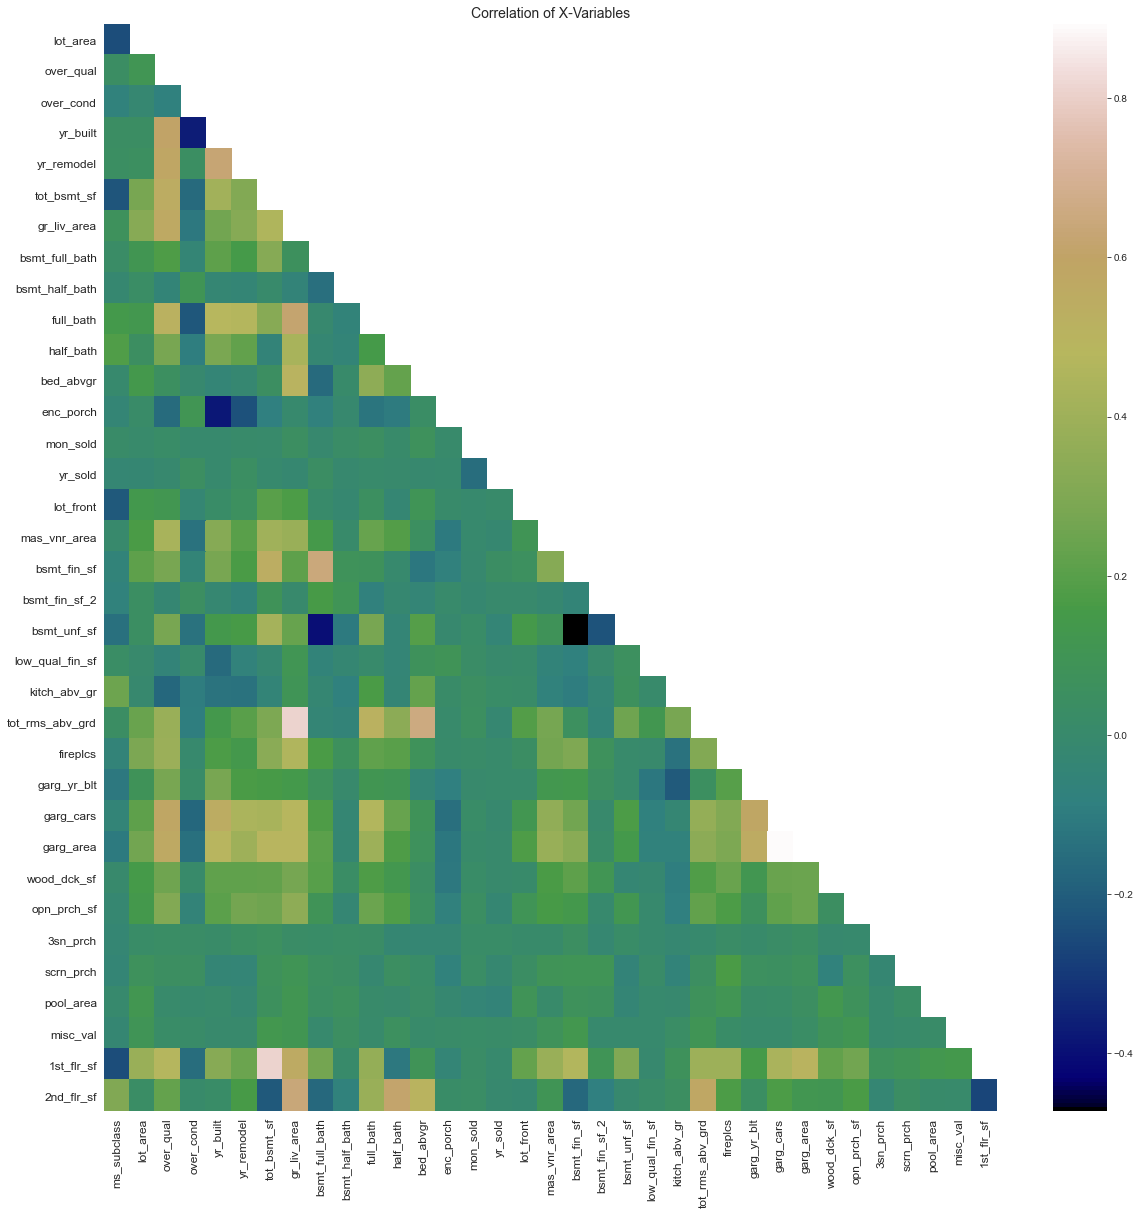

In [20]:
# using the correl_plot to create the correlation heatmap for the X variables
correl_plot(X_train, "Correlation of X-Variables", (20,20),False)

Based on the above correlation heat map, it is observed that there are multicollinearity issue and can expect the model created from these features to not perform well

In [21]:
# Examining the training dataset with the function print_summary.
print_summary(X_train)

Column:     ms_subclass  min:         20  max:        190  type:      int64  null:          0
Column:       ms_zoning  min:    A (agr)  max:         RM  type:     object  null:          0
Column:        lot_area  min:       1300  max:     159000  type:      int64  null:          0
Column:            util  min:     AllPub  max:     NoSewr  type:     object  null:          0
Column:      lot_config  min:     Corner  max:     Inside  type:     object  null:          0
Column:           neigh  min:    Blmngtn  max:    Veenker  type:     object  null:          0
Column:        bld_type  min:       1Fam  max:     TwnhsE  type:     object  null:          0
Column:        hs_style  min:     1.5Fin  max:       SLvl  type:     object  null:          0
Column:       over_qual  min:          1  max:         10  type:      int64  null:          0
Column:       over_cond  min:          1  max:          9  type:      int64  null:          0
Column:        yr_built  min:       1872  max:       2010  t

In [22]:
# Examining the test dataset with the function print_summary.
print_summary(X_test)

Column:     ms_subclass  min:         20  max:        190  type:      int64  null:          0
Column:       ms_zoning  min:    C (all)  max:         RM  type:     object  null:          0
Column:        lot_area  min:       1477  max:     215245  type:      int64  null:          0
Column:            util  min:     AllPub  max:     NoSewr  type:     object  null:          0
Column:      lot_config  min:     Corner  max:     Inside  type:     object  null:          0
Column:           neigh  min:    Blmngtn  max:    Veenker  type:     object  null:          0
Column:        bld_type  min:       1Fam  max:     TwnhsE  type:     object  null:          0
Column:        hs_style  min:     1.5Fin  max:       SLvl  type:     object  null:          0
Column:       over_qual  min:          2  max:         10  type:      int64  null:          0
Column:       over_cond  min:          1  max:          9  type:      int64  null:          0
Column:        yr_built  min:       1880  max:       2010  t

#### Removing outliers

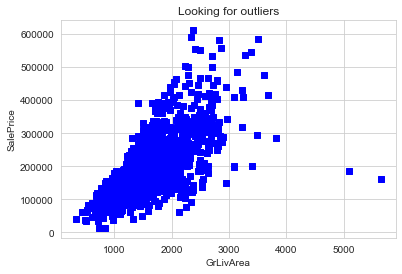

In [23]:
# Looking for outliers and removing outliers - See below
plt.scatter(X_train.gr_liv_area, df_train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()


Based on the describe function and summary above, for the variable gr_liv_area (which is the above grade living area square feet) the 75% percentile value is 1728.5 sq feet but the maximum value is 5642 sq feet which seems to be imply there are outliers. Hence, i plot a scatter plot of GrLivArea vs Sale Price and observed that there are 2 points (>5000 square feet) in the training dataset which appear to be outliers - very large houses but sold at a very low price. Looking at the documentation (reference: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt), the recommendation from the author includes removing any houses with more than 4000 square feet from the data set before assigning it to students. I will proceed to remove data for gr_liv_area greater than 4000 square feet from both the training dataset below.

In [24]:
# checking for outlier with 'garg_yr_blt' after 2010 as I spotted that the maximum value is 2207 - Incorrect

X_train[X_train['garg_yr_blt']>2010]

ms_subclass ms_zoning  lot_area    util lot_config   neigh bld_type  \
1699           20        RL      8298  AllPub     Inside  Timber     1Fam   

     hs_style  over_qual  over_cond  ...  garg_cnd  pvd_drive wood_dck_sf  \
1699   1Story          8          5  ...        TA          Y         132   

     opn_prch_sf 3sn_prch  scrn_prch pool_area misc_val  1st_flr_sf  \
1699           0        0          0         0        0        1564   

      2nd_flr_sf  
1699           0  

[1 rows x 74 columns]

Looking at the print_summary above, I observed that for 'garg_yr_blt' in traiining dataset - the maximum value which is year is 2207. The data is supposedly up to 2010, also we are only in year 2021. I believe it is the typo error and will use the 'yr_built' data to replace the incorrect value(s).

In [25]:
# Attached Sale Price to X_train dataframe and removing data with gr_liv_area >4000 square feet as mentioned above
df_combined = pd.concat([X_train, df_train[targ]], axis=1)
print("Removing outliers from df_combined")
print(df_combined.shape)
df_combined = df_combined[df_combined.gr_liv_area < 4000]
print(df_combined.shape)

# Replacing outlier for 'garag_yr_blt' in training dataset with the 'yr_built'.
df_combined.loc[df_combined['garg_yr_blt']>2010, ['garg_yr_blt']] = df_combined.loc[df_combined['garg_yr_blt']>2010]['yr_built']

# checking if the outlier is replaced
df_combined[df_combined['garg_yr_blt']>2010]


Removing outliers from df_combined
(2051, 75)
(2049, 75)


Empty DataFrame
Columns: [ms_subclass, ms_zoning, lot_area, util, lot_config, neigh, bld_type, hs_style, over_qual, over_cond, yr_built, yr_remodel, ext_qual, ext_cond, bsmt_cond, tot_bsmt_sf, heat_qc, cen_air, gr_liv_area, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath, bed_abvgr, kit_qual, funct, enc_porch, garag_type, mon_sold, yr_sold, sale_type, lot_front, street, lot_shape, land_cont, land_slop, cond1, cond2, roof_style, roof_matl, ext_1st, ext_2nd, mas_vnr_type, mas_vnr_area, found, bsmt_qual, bsmt_exp, bsmt_fin_type_1, bsmt_fin_sf, bsmt_fin_type_2, bsmt_fin_sf_2, bsmt_unf_sf, heating, electrical, low_qual_fin_sf, kitch_abv_gr, tot_rms_abv_grd, fireplcs, fireplc_qu, garg_yr_blt, garg_fnsh, garg_cars, garg_area, garg_qlty, garg_cnd, pvd_drive, wood_dck_sf, opn_prch_sf, 3sn_prch, scrn_prch, pool_area, misc_val, 1st_flr_sf, 2nd_flr_sf, SalePrice]
Index: []

[0 rows x 75 columns]

In [26]:
# Separating df_combined into X_train and y variable which is the target
X_train = df_combined.drop(columns = 'SalePrice')
print(X_train.shape)
X_train.head()

(2049, 74)


ms_subclass ms_zoning  lot_area    util lot_config    neigh bld_type  \
0           60        RL     13517  AllPub    CulDSac   Sawyer     1Fam   
1           60        RL     11492  AllPub    CulDSac  SawyerW     1Fam   
2           20        RL      7922  AllPub     Inside    NAmes     1Fam   
3           60        RL      9802  AllPub     Inside   Timber     1Fam   
4           50        RL     14235  AllPub     Inside  SawyerW     1Fam   

  hs_style  over_qual  over_cond  ...  garg_cnd  pvd_drive wood_dck_sf  \
0   2Story          6          8  ...        TA          Y           0   
1   2Story          7          5  ...        TA          Y           0   
2   1Story          5          7  ...        TA          Y           0   
3   2Story          5          5  ...        TA          Y         100   
4   1.5Fin          6          8  ...        TA          N           0   

  opn_prch_sf 3sn_prch  scrn_prch pool_area misc_val  1st_flr_sf  2nd_flr_sf  
0          44        0          0         0        0         725         754  
1          74        0          0         0        0         913        1209  
2          52        0          0         0        0        1057           0  
3           0        0          0         0        0         744         700  
4          59        0          0         0        0         831         614  

[5 rows x 74 columns]

In [27]:
# Evaluating the current features relative to target - Sale Price for an initial understanding of the features
print("Evaluating the features relative to target")
corr = df_combined.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Evaluating the features relative to target
SalePrice          1.000000
over_qual          0.803462
gr_liv_area        0.719463
tot_bsmt_sf        0.665116
garg_area          0.655097
1st_flr_sf         0.648252
garg_cars          0.648227
yr_built           0.572405
yr_remodel         0.550872
full_bath          0.538225
mas_vnr_area       0.511273
tot_rms_abv_grd    0.509775
fireplcs           0.473783
bsmt_fin_sf        0.446103
opn_prch_sf        0.338545
wood_dck_sf        0.327629
lot_area           0.303744
bsmt_full_bath     0.284433
half_bath          0.283372
garg_yr_blt        0.258493
2nd_flr_sf         0.248826
bsmt_unf_sf        0.190883
lot_front          0.185351
bed_abvgr          0.137145
scrn_prch          0.134555
3sn_prch           0.048721
mon_sold           0.032508
pool_area          0.025805
bsmt_fin_sf_2      0.016398
misc_val          -0.010323
yr_sold           -0.015174
low_qual_fin_sf   -0.041608
bsmt_half_bath    -0.045534
ms_subclass       -0.087331
over_

#### Examining the Categorical Variable individually

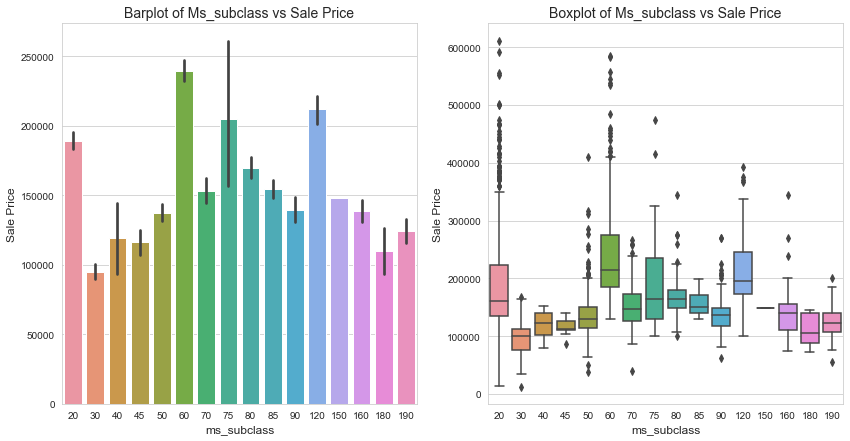

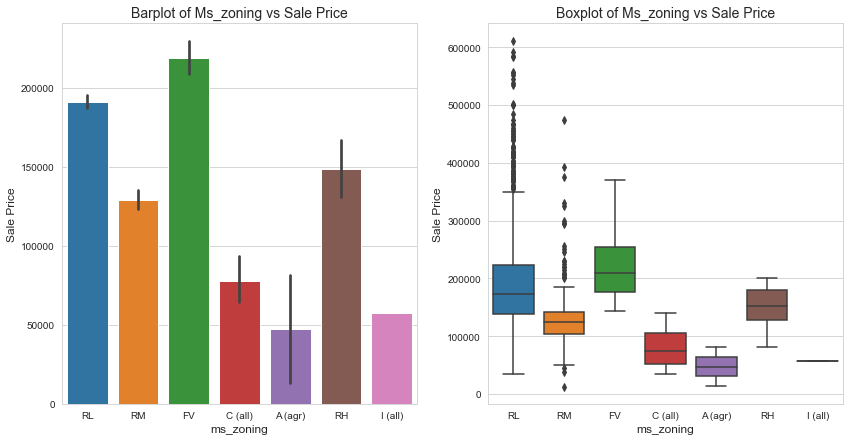

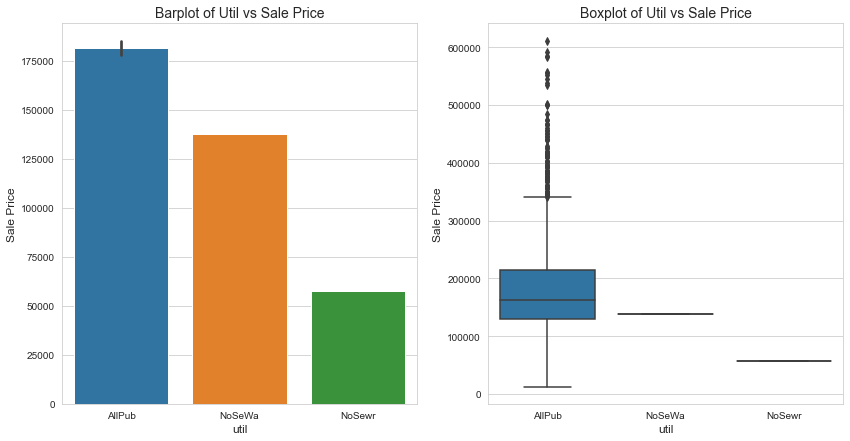

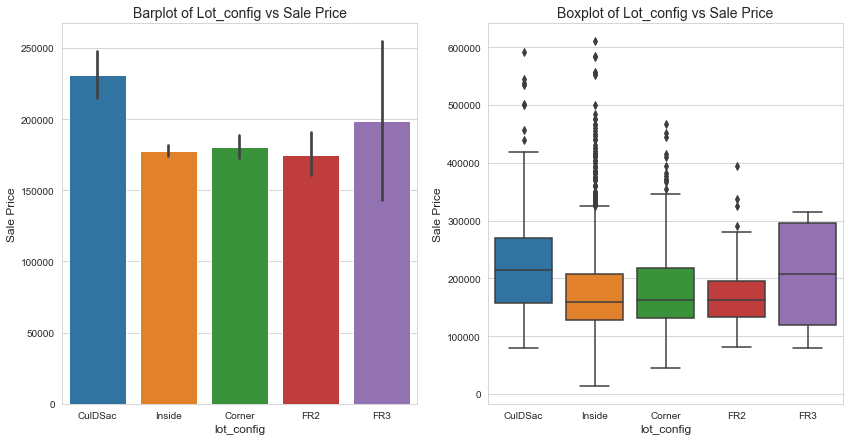

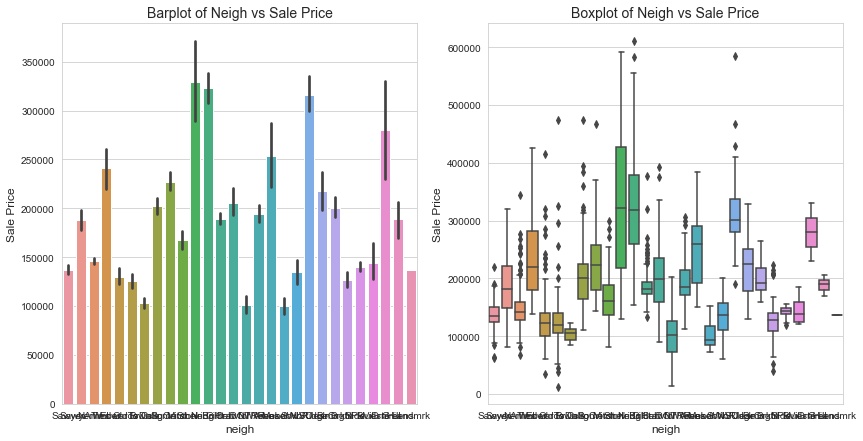

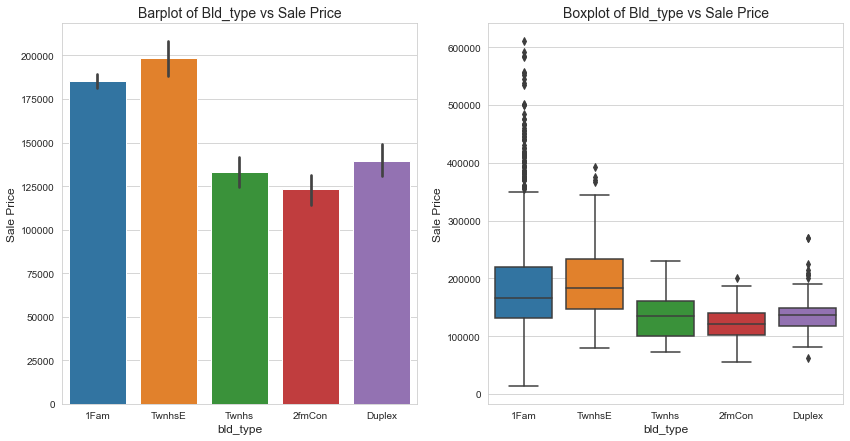

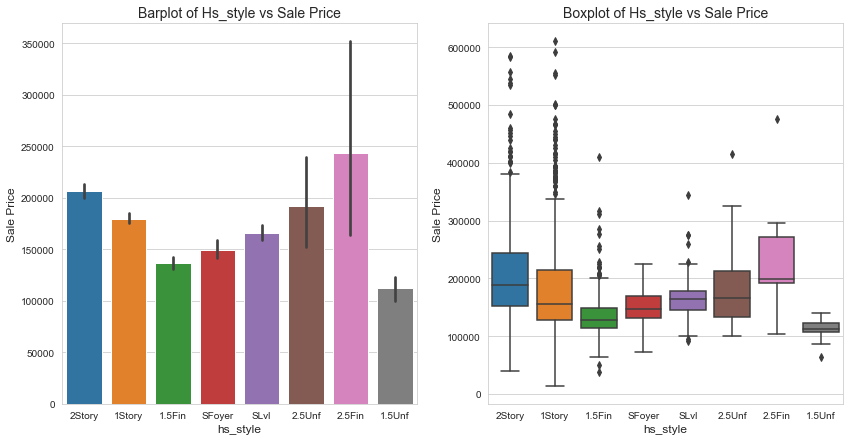

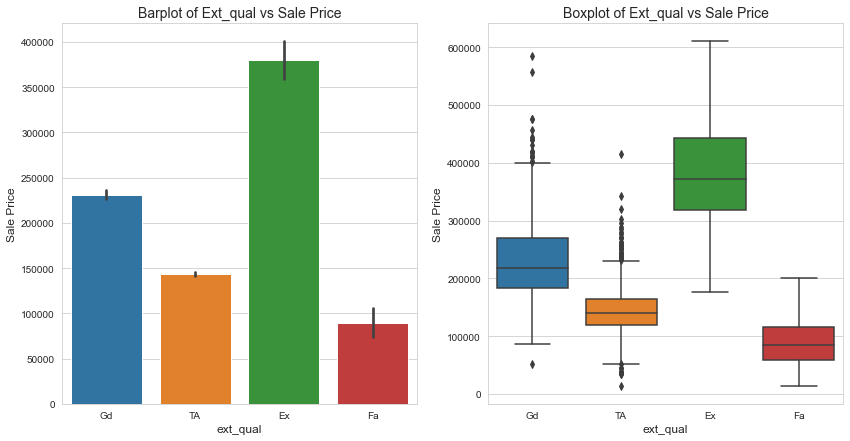

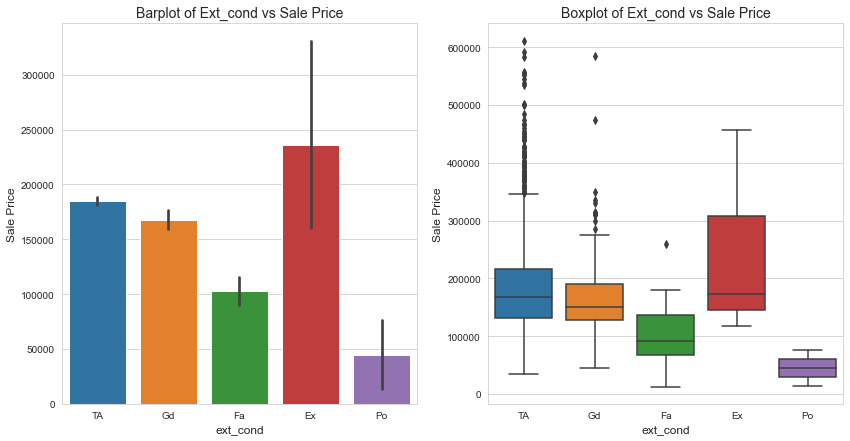

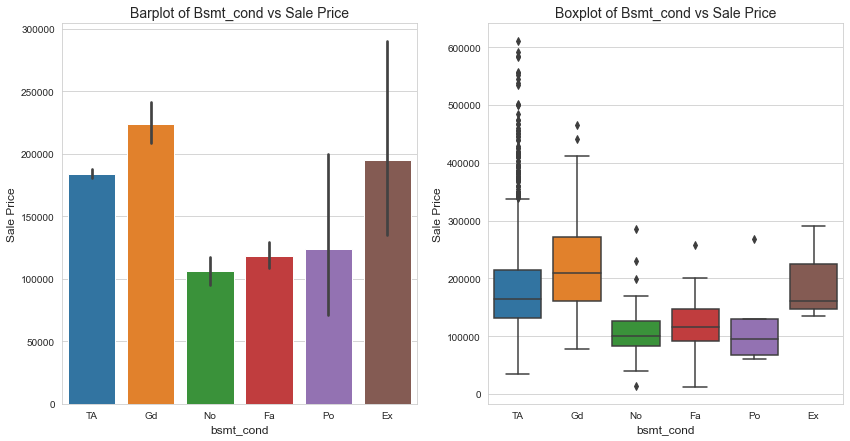

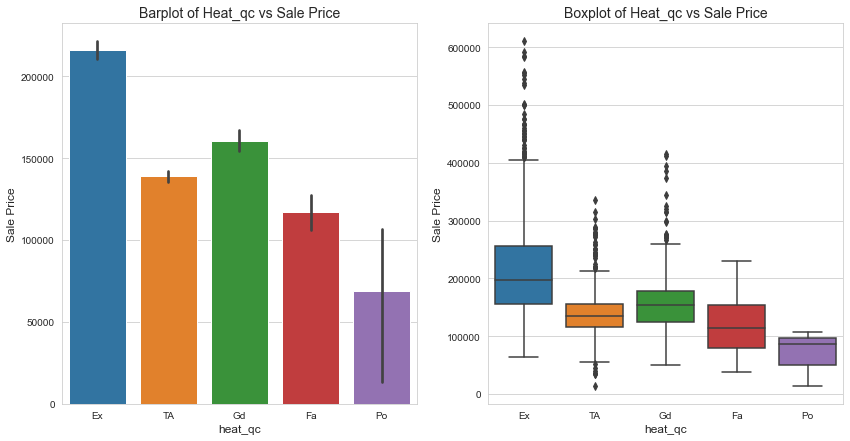

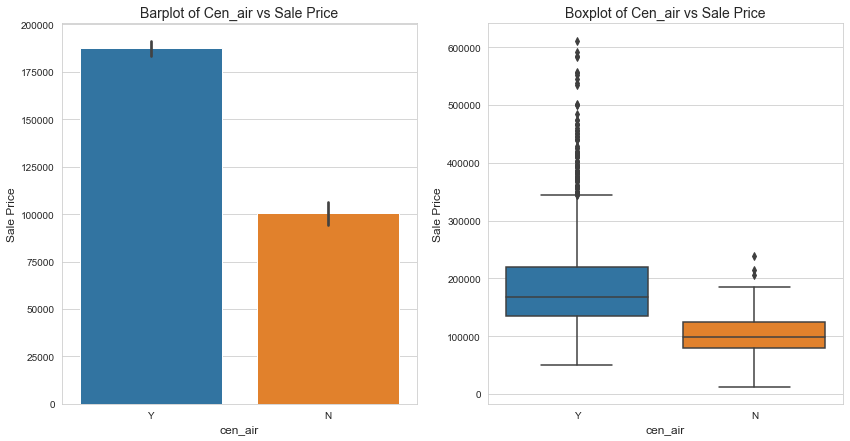

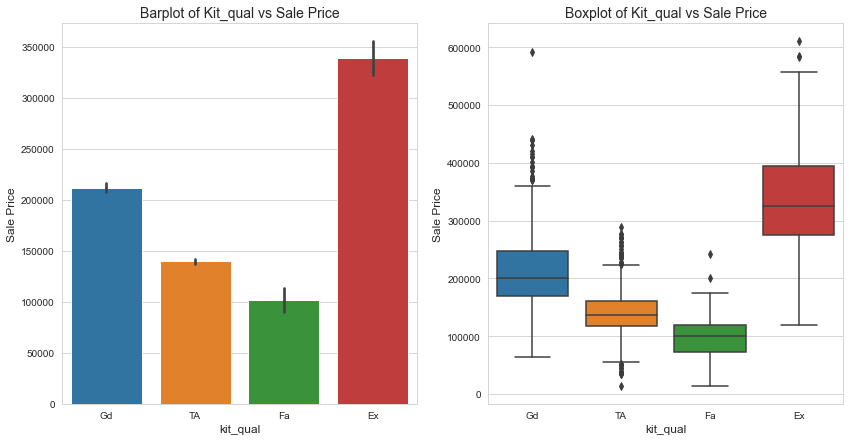

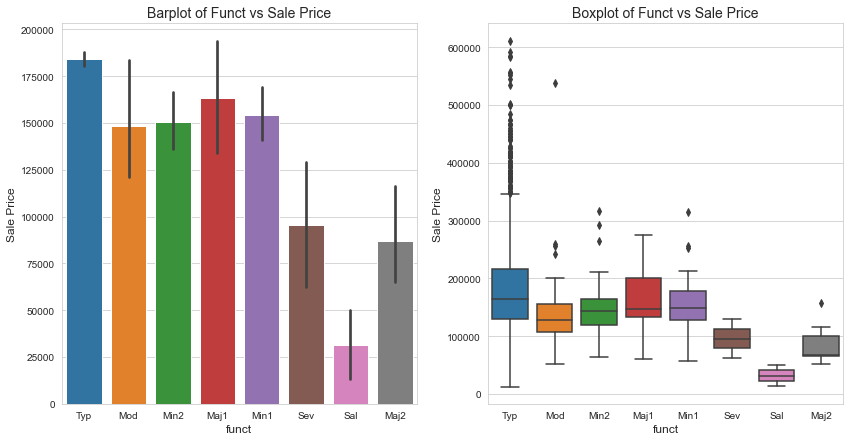

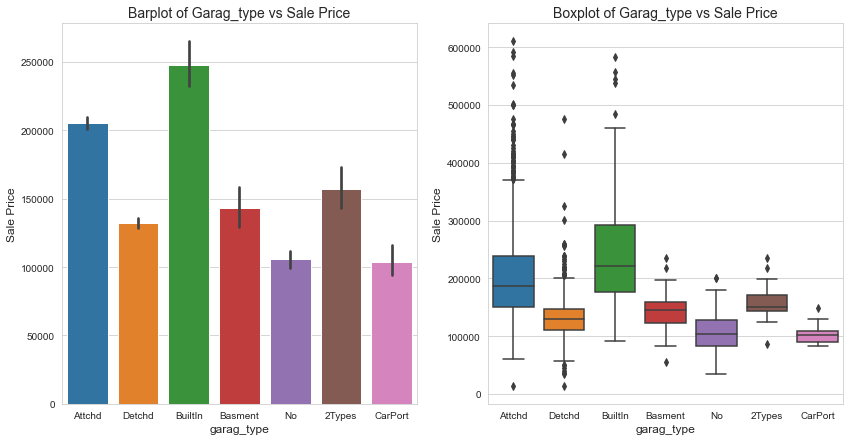

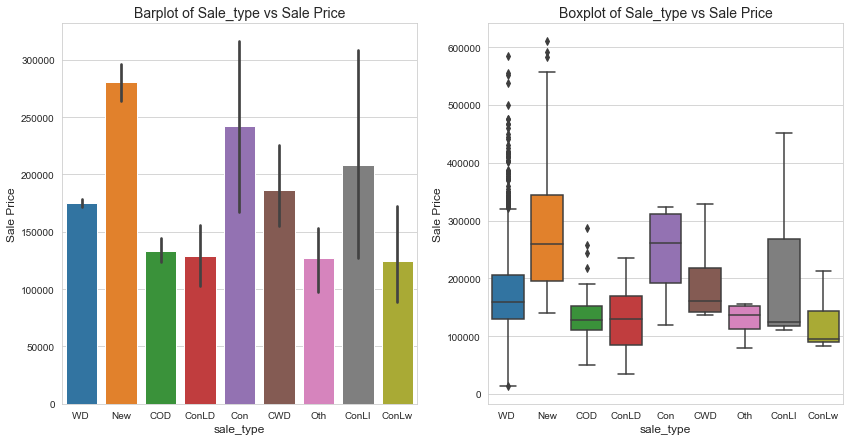

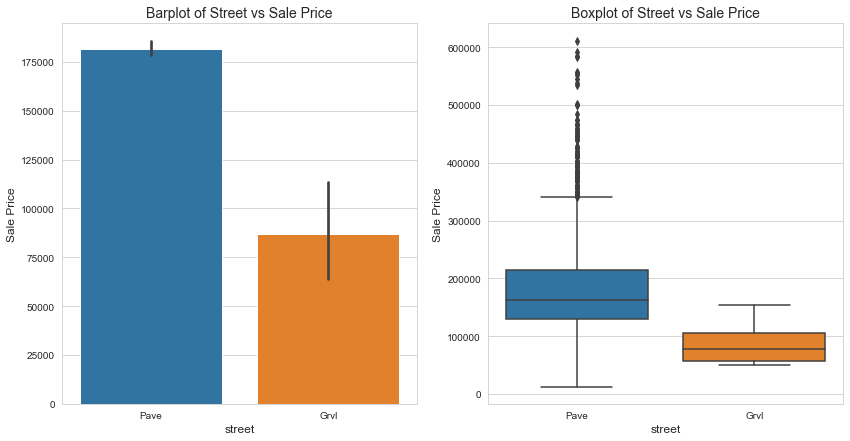

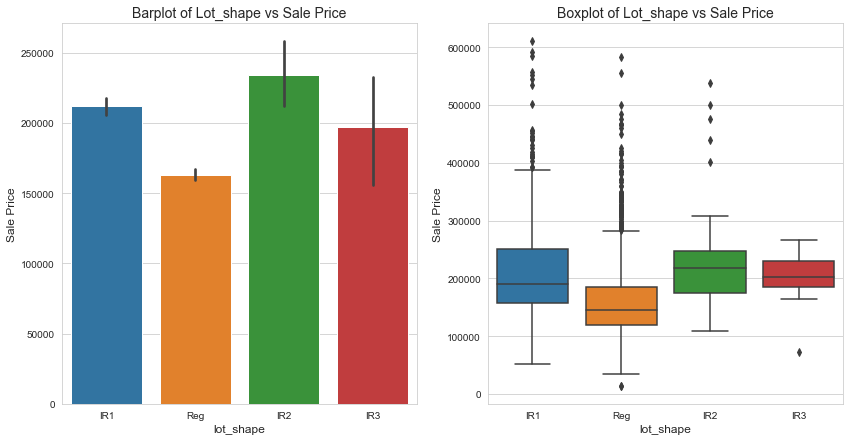

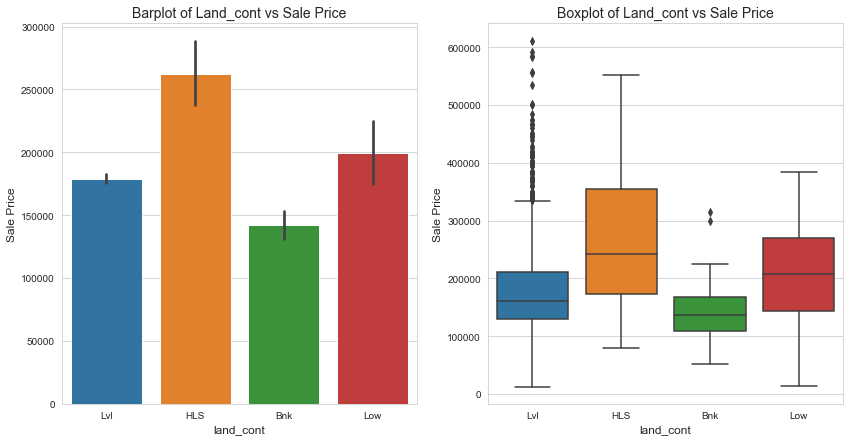

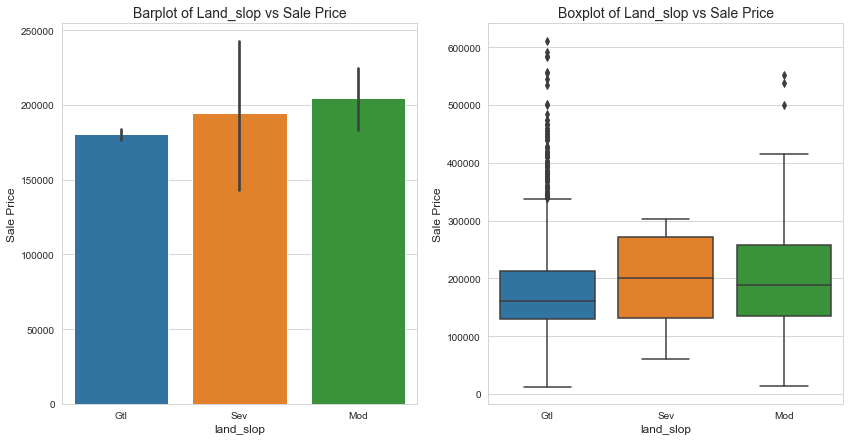

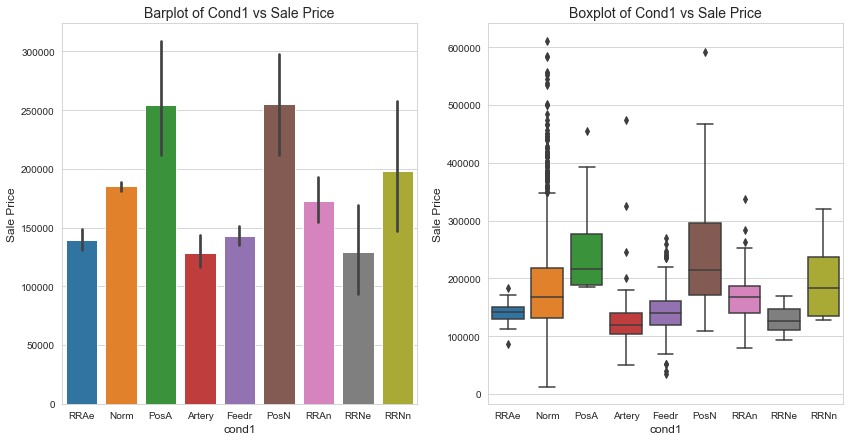

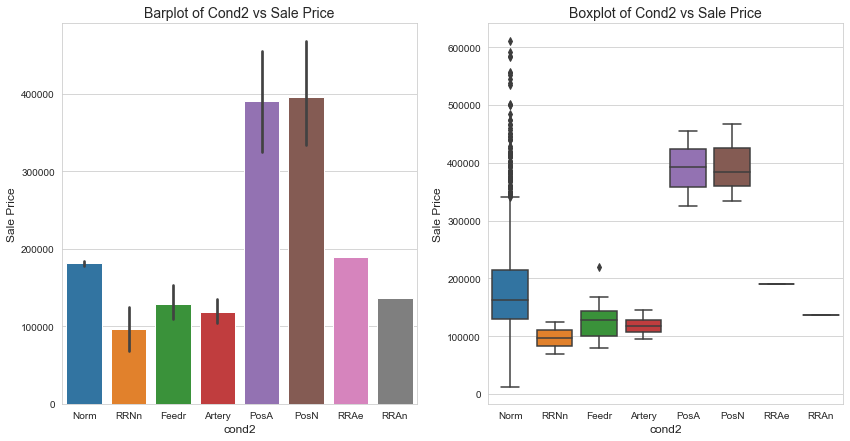

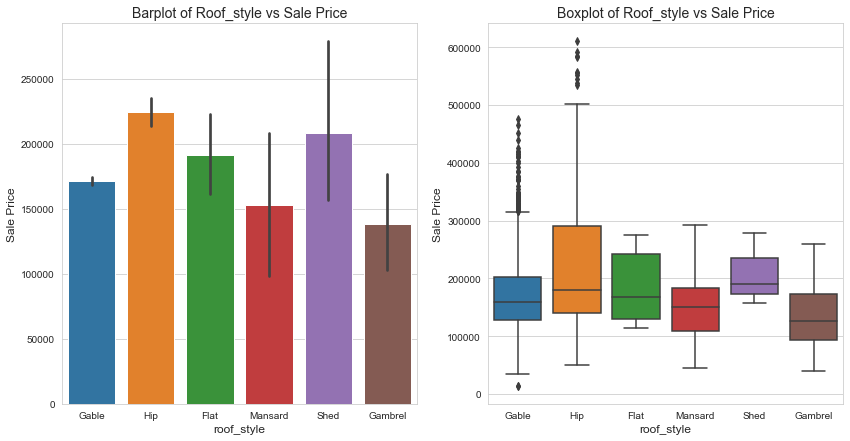

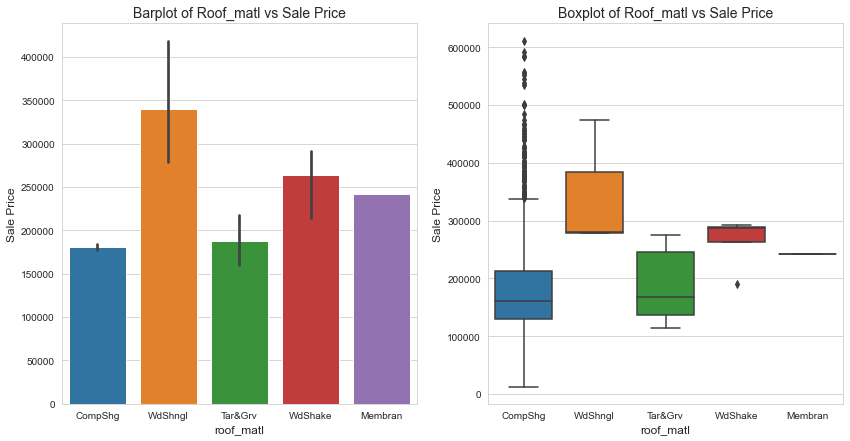

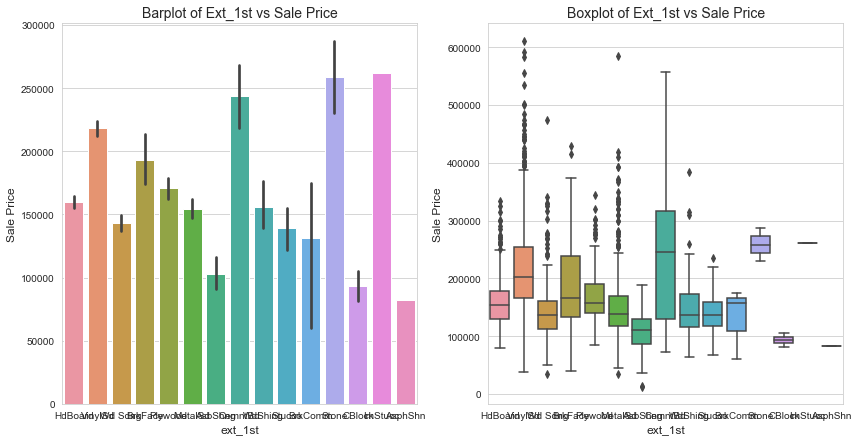

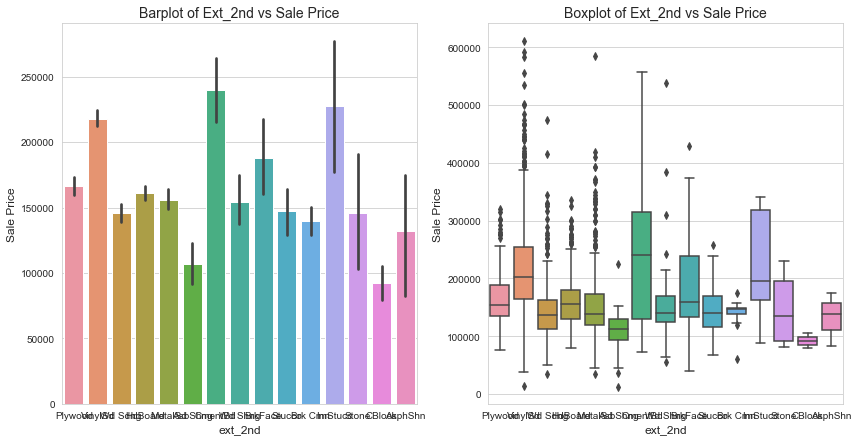

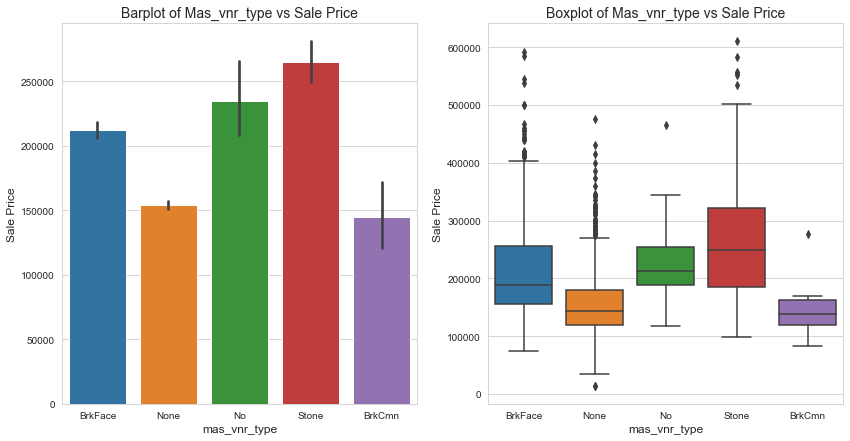

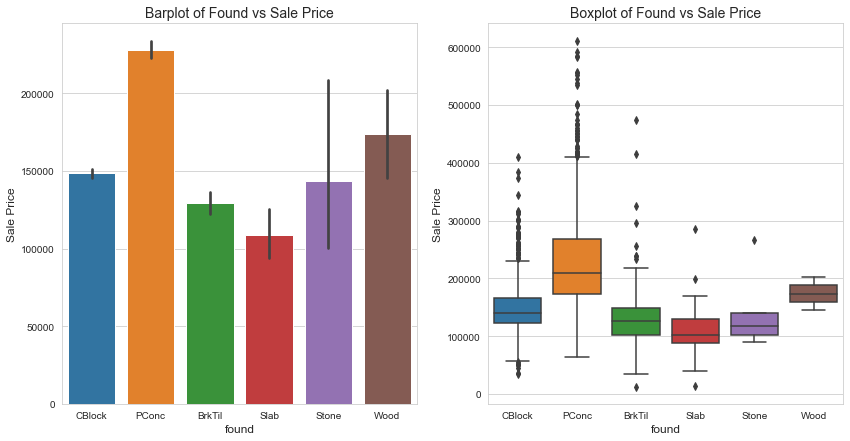

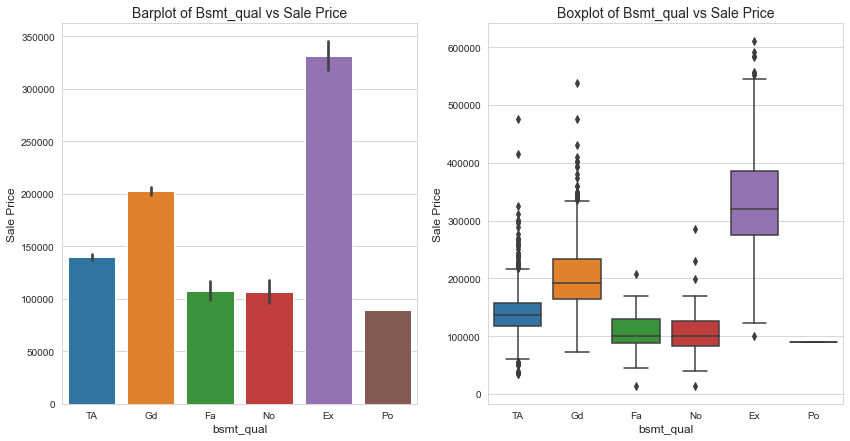

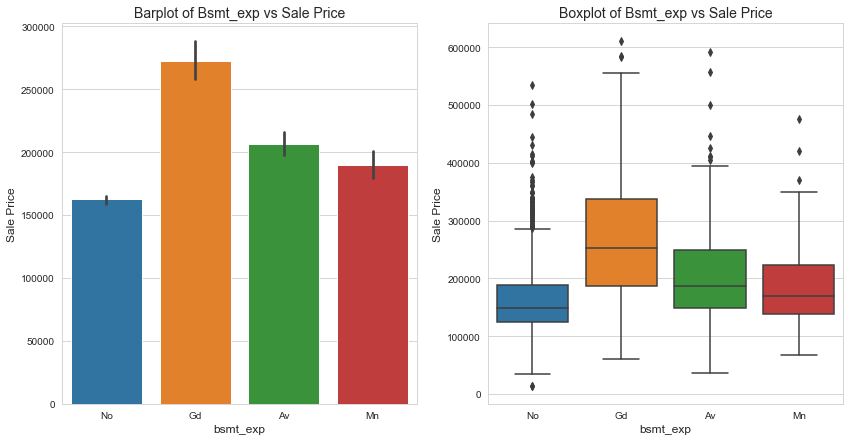

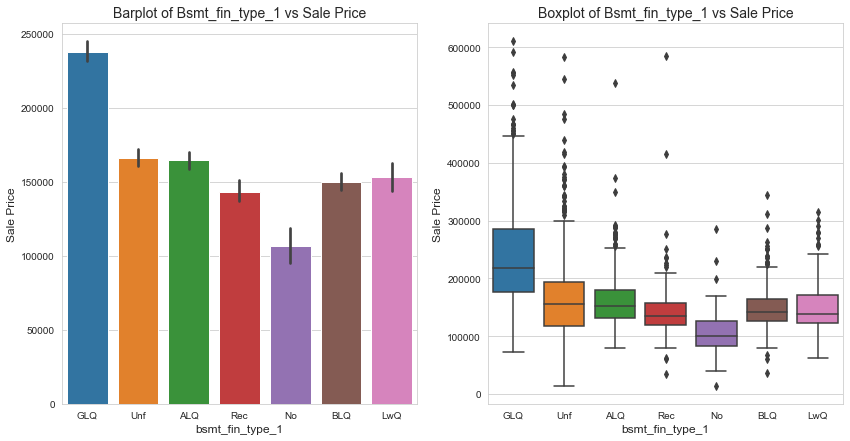

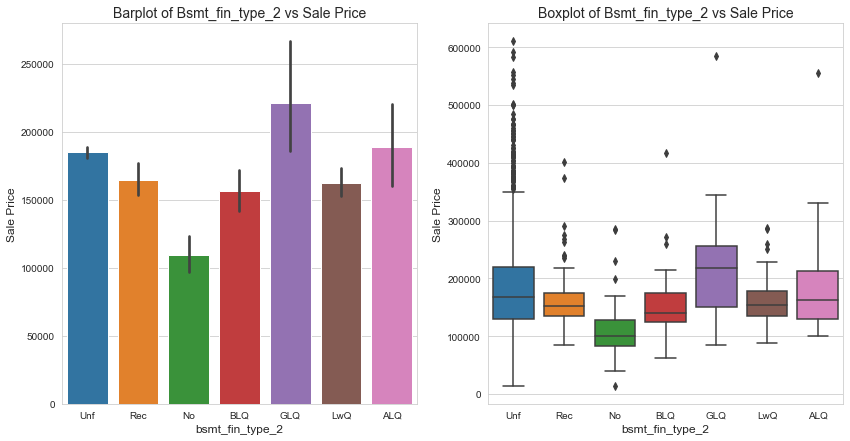

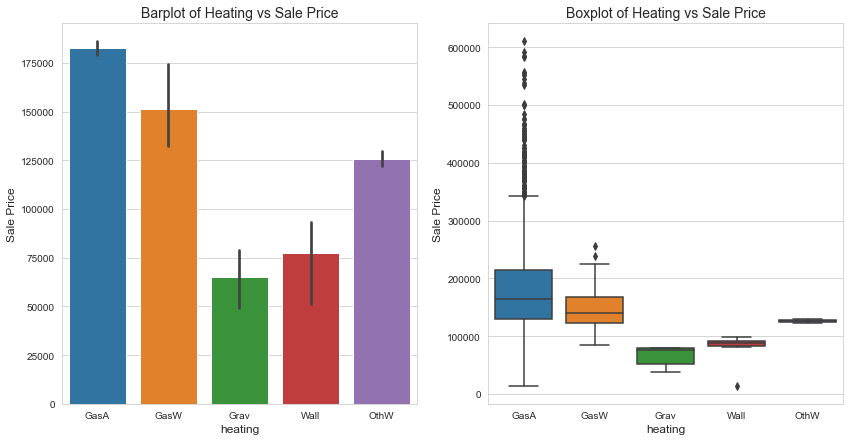

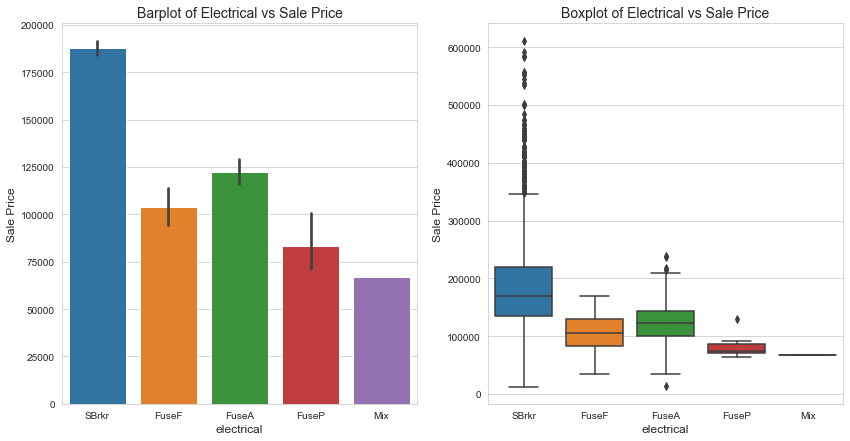

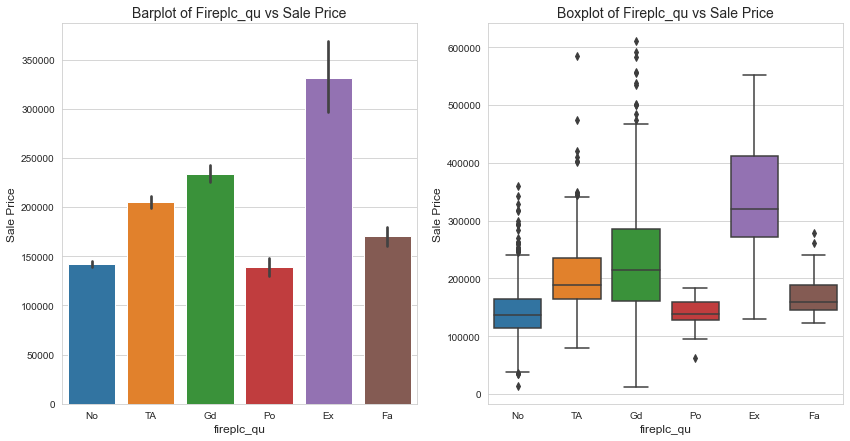

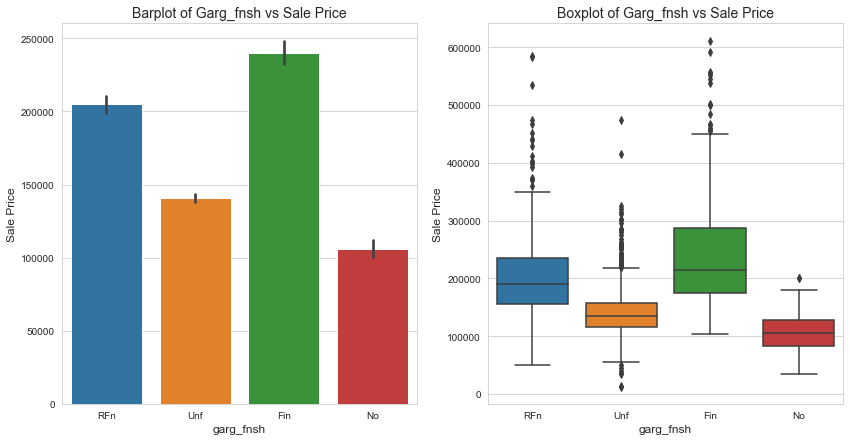

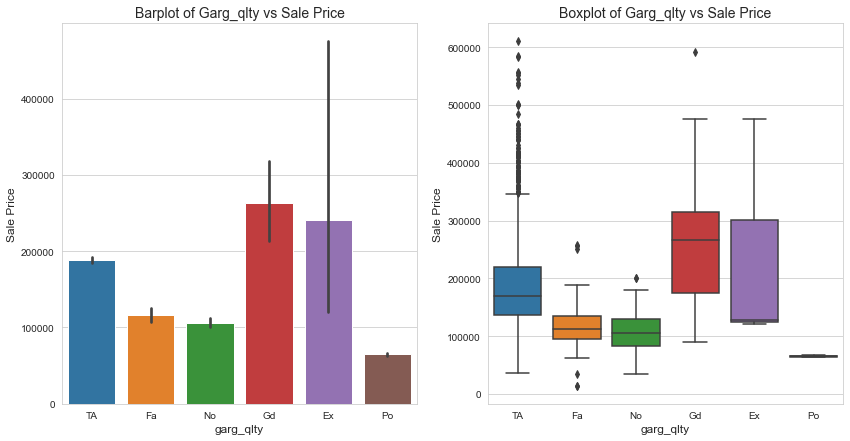

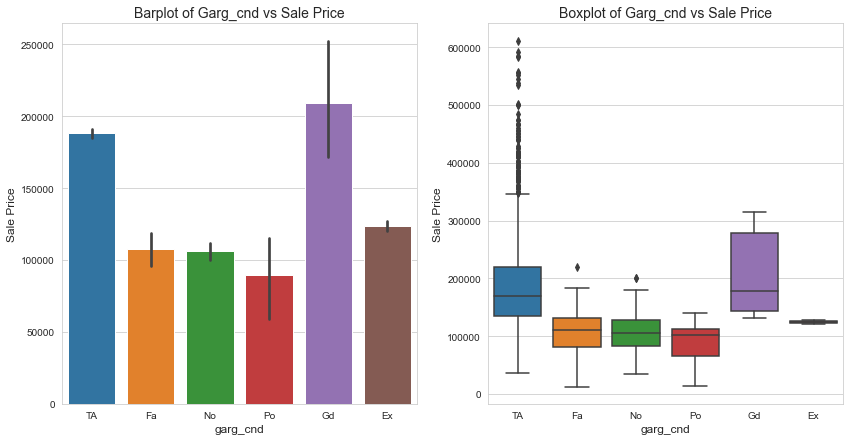

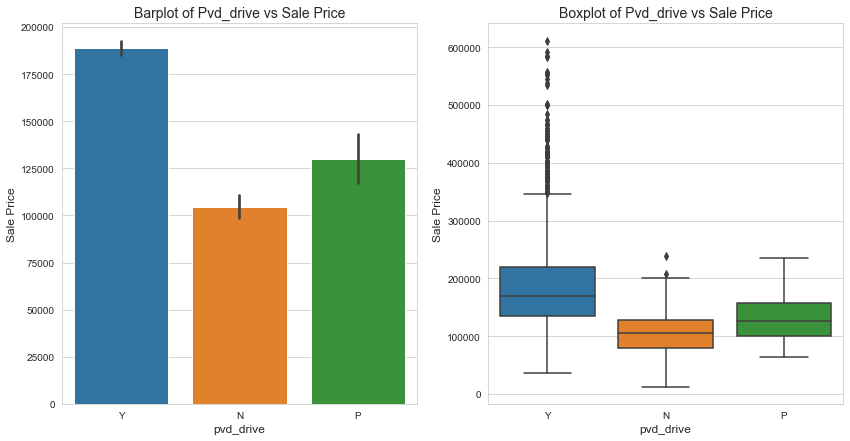

In [28]:
# plotting the barplot and boxplot of the categorical variable vs sale price
for col in cat_features:
    single_bar_box(X_train, col, (14,7))

In [29]:
# Combine the test and training data sets to create categorical variables
df_list = [X_train, X_test]
X_train['ID'] = 'train'
X_test['ID'] = 'test'
X_super = pd.concat(df_list)
print(X_super.shape, X_train.shape, X_test.shape)

X_super.sort_values(by = 'ID', ascending = False).head()

# reference
# https://stackoverflow.com/questions/48758744/creating-dummy-variables-for-multiple-cateogorical-variables-in-python

(2927, 75) (2049, 75) (878, 75)


ms_subclass ms_zoning  lot_area    util lot_config    neigh bld_type  \
0              60        RL     13517  AllPub    CulDSac   Sawyer     1Fam   
1538           85        RL     11235  AllPub     Corner   Sawyer     1Fam   
1376           70        RH      8525  AllPub     Inside    SWISU     1Fam   
1375          120        RL      6289  AllPub     Inside  NridgHt   TwnhsE   
1374           30        RL      4130  AllPub     Inside  BrkSide     1Fam   

     hs_style  over_qual  over_cond  ...  pvd_drive  wood_dck_sf opn_prch_sf  \
0      2Story          6          8  ...          Y            0          44   
1538   SFoyer          5          6  ...          Y           64           0   
1376   2Story          5          6  ...          N            0         192   
1375   1Story          6          5  ...          Y          192          28   
1374   1Story          3          6  ...          N            0           0   

     3sn_prch scrn_prch  pool_area misc_val 1st_flr_sf  2nd_flr_sf     ID  
0           0         0          0        0        725         754  train  
1538        0        64          0        0       1075           0  train  
1376        0         0          0        0       1024         940  train  
1375        0         0          0        0       1362           0  train  
1374        0         0          0        0        729           0  train  

[5 rows x 75 columns]

#### Encoding categorical features as ordered numbers if possible

In [30]:
#Encode some categorical features as ordered numbers when they are ordinal
X_super = X_super.replace({"lot_shape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                           "util" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4},
                           "land_slop" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                           "ext_qual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "ext_cond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "bsmt_qual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                            "bsmt_cond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                            "bsmt_fin_type_1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                            "bsmt_fin_type_2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                            "heat_qc" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                            "kit_qual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                            "funct" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                            "fireplc_qu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                            "garg_fnsh" : {"No" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                            "garg_qlty" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                            "garg_cnd" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                            "pvd_drive" : {"N" : 0, "P" : 1, "Y" : 2}
                           })
X_super.head()

ms_subclass ms_zoning  lot_area  util lot_config    neigh bld_type  \
0           60        RL     13517     4    CulDSac   Sawyer     1Fam   
1           60        RL     11492     4    CulDSac  SawyerW     1Fam   
2           20        RL      7922     4     Inside    NAmes     1Fam   
3           60        RL      9802     4     Inside   Timber     1Fam   
4           50        RL     14235     4     Inside  SawyerW     1Fam   

  hs_style  over_qual  over_cond  ...  pvd_drive  wood_dck_sf  opn_prch_sf  \
0   2Story          6          8  ...          2            0           44   
1   2Story          7          5  ...          2            0           74   
2   1Story          5          7  ...          2            0           52   
3   2Story          5          5  ...          2          100            0   
4   1.5Fin          6          8  ...          0            0           59   

   3sn_prch  scrn_prch  pool_area  misc_val 1st_flr_sf  2nd_flr_sf     ID  
0         0          0          0         0        725         754  train  
1         0          0          0         0        913        1209  train  
2         0          0          0         0       1057           0  train  
3         0          0          0         0        744         700  train  
4         0          0          0         0        831         614  train  

[5 rows x 75 columns]

In [31]:
# Update the cat_features and num_features lists to reflect after converting the ordinal category features
cat_features1 = ['ms_subclass', 'ms_zoning', 'lot_config', 'neigh', 'bld_type', 'hs_style', 
                 'cen_air', 'garag_type','sale_type', 'street', 'land_cont', 'cond1', 'cond2',
                'roof_style', 'roof_matl','ext_1st', 'ext_2nd', 'mas_vnr_type', 'found',
                'bsmt_exp','heating','electrical']

num_features1 = ['lot_area', 'over_qual', 'over_cond', 'yr_built',
                'yr_remodel', 'tot_bsmt_sf', 'gr_liv_area', 'bsmt_full_bath',
                'bsmt_half_bath', 'full_bath', 'half_bath', 'bed_abvgr',
                'enc_porch', 'mon_sold', 'yr_sold', 'lot_front','mas_vnr_area', 'bsmt_fin_sf',
                'bsmt_fin_sf_2','bsmt_unf_sf','low_qual_fin_sf','kitch_abv_gr','tot_rms_abv_grd',
                'fireplcs','garg_yr_blt','garg_cars', 'garg_area','wood_dck_sf', 'opn_prch_sf',
                '3sn_prch', 'scrn_prch', 'pool_area','misc_val','1st_flr_sf', '2nd_flr_sf', 'lot_shape',
                'util', 'land_slop', 'ext_qual', 'ext_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_fin_type_1',
                'bsmt_fin_type_2', 'heat_qc', 'kit_qual', 'funct', 'fireplc_qu', 
                'garg_fnsh','garg_qlty','garg_cnd','pvd_drive']

In [32]:
#Checking if num_features is of the correct data type
X_super[num_features1].dtypes

lot_area             int64
over_qual            int64
over_cond            int64
yr_built             int64
yr_remodel           int64
tot_bsmt_sf        float64
gr_liv_area          int64
bsmt_full_bath     float64
bsmt_half_bath     float64
full_bath            int64
half_bath            int64
bed_abvgr            int64
enc_porch            int64
mon_sold             int64
yr_sold              int64
lot_front          float64
mas_vnr_area       float64
bsmt_fin_sf        float64
bsmt_fin_sf_2      float64
bsmt_unf_sf        float64
low_qual_fin_sf      int64
kitch_abv_gr         int64
tot_rms_abv_grd      int64
fireplcs             int64
garg_yr_blt        float64
garg_cars          float64
garg_area          float64
wood_dck_sf          int64
opn_prch_sf          int64
3sn_prch             int64
scrn_prch            int64
pool_area            int64
misc_val             int64
1st_flr_sf           int64
2nd_flr_sf           int64
lot_shape            int64
util                 int64
l

In [33]:
# Create dummy variable for category variable

X_super = pd.get_dummies(X_super, columns = cat_features1, drop_first=True)
print(X_super.shape)
print(X_super.columns)

(2927, 215)
Index(['lot_area', 'util', 'over_qual', 'over_cond', 'yr_built', 'yr_remodel',
       'ext_qual', 'ext_cond', 'bsmt_cond', 'tot_bsmt_sf',
       ...
       'bsmt_exp_No', 'heating_GasA', 'heating_GasW', 'heating_Grav',
       'heating_OthW', 'heating_Wall', 'electrical_FuseF', 'electrical_FuseP',
       'electrical_Mix', 'electrical_SBrkr'],
      dtype='object', length=215)


### Create new variables

In [34]:
# Create an age of home variable at time of sale and age of remodel
X_super['age_home_at_sale'] = X_super['yr_sold'] - X_super['yr_built']
X_super['age_remodel_at_sale'] = X_super['yr_sold'] - X_super['yr_remodel']

# Drop columns
X_super = X_super.drop(columns = ['yr_built', 'yr_remodel'])

In [35]:
# Confirm if the 2 columns are added to the dataframe
X_super.head()

lot_area  util  over_qual  over_cond  ext_qual  ext_cond  bsmt_cond  \
0     13517     4          6          8         4         3          3   
1     11492     4          7          5         4         3          3   
2      7922     4          5          7         3         4          3   
3      9802     4          5          5         3         3          3   
4     14235     4          6          8         3         3          4   

   tot_bsmt_sf  heat_qc  gr_liv_area  ...  heating_GasW  heating_Grav  \
0        725.0        5         1479  ...             0             0   
1        913.0        5         2122  ...             0             0   
2       1057.0        3         1057  ...             0             0   
3        384.0        4         1444  ...             0             0   
4        676.0        3         1445  ...             0             0   

   heating_OthW  heating_Wall  electrical_FuseF  electrical_FuseP  \
0             0             0                 0                 0   
1             0             0                 0                 0   
2             0             0                 0                 0   
3             0             0                 0                 0   
4             0             0                 0                 0   

   electrical_Mix  electrical_SBrkr  age_home_at_sale  age_remodel_at_sale  
0               0                 1                34                    5  
1               0                 1                13                   12  
2               0                 1                57                    3  
3               0                 1                 4                    3  
4               0                 1               110                   17  

[5 rows x 215 columns]

In [36]:
# Update the num_features because of the dropped and new columns
num_features2 = ['lot_area', 'over_qual', 'over_cond', 'tot_bsmt_sf', 'gr_liv_area', 'bsmt_full_bath',
                'bsmt_half_bath', 'full_bath', 'half_bath', 'bed_abvgr',
                'enc_porch', 'mon_sold', 'yr_sold', 'lot_front','mas_vnr_area', 'bsmt_fin_sf',
                'bsmt_fin_sf_2','bsmt_unf_sf','low_qual_fin_sf','kitch_abv_gr','tot_rms_abv_grd',
                'fireplcs','garg_yr_blt','garg_cars', 'garg_area','wood_dck_sf', 'opn_prch_sf',
                '3sn_prch', 'scrn_prch', 'pool_area','misc_val','1st_flr_sf', '2nd_flr_sf', 'lot_shape',
                'util', 'land_slop', 'ext_qual', 'ext_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_fin_type_1',
                'bsmt_fin_type_2', 'heat_qc', 'kit_qual', 'funct', 'fireplc_qu', 
                'garg_fnsh','garg_qlty','garg_cnd','pvd_drive', 'age_home_at_sale','age_remodel_at_sale']

### Redividing the data into test and training dataset 

In [37]:
# Redivide the data using the ID column and drop the ID column
X1_train = X_super[X_super['ID'] == 'train'].drop(columns = ['ID'])
X1_test = X_super[X_super['ID'] == 'test'].drop(columns = ['ID'])
print(X_super.shape, X1_train.shape, X1_test.shape)

X1_test.head()

(2927, 215) (2049, 214) (878, 214)


lot_area  util  over_qual  over_cond  ext_qual  ext_cond  bsmt_cond  \
0      9142     4          6          8         3         2          3   
1      9662     4          5          4         3         3          3   
2     17104     4          7          5         4         3          4   
3      8520     4          5          6         4         3          3   
4      9500     4          6          5         3         3          3   

   tot_bsmt_sf  heat_qc  gr_liv_area  ...  heating_GasW  heating_Grav  \
0       1020.0        4         1928  ...             0             0   
1       1967.0        3         1967  ...             0             0   
2        654.0        5         1496  ...             0             0   
3        968.0        3          968  ...             0             0   
4       1394.0        4         1394  ...             0             0   

   heating_OthW  heating_Wall  electrical_FuseF  electrical_FuseP  \
0             0             0                 0                 1   
1             0             0                 0                 0   
2             0             0                 0                 0   
3             0             0                 0                 0   
4             0             0                 0                 0   

   electrical_Mix  electrical_SBrkr  age_home_at_sale  age_remodel_at_sale  
0               0                 0                96                   56  
1               0                 1                29                   29  
2               0                 1                 0                    0  
3               0                 1                84                    1  
4               0                 1                46                   46  

[5 rows x 214 columns]

In [38]:
# Checking the summary to see if everything is in place
print_summary(X1_train)

Column:        lot_area  min:       1300  max:     159000  type:      int64  null:          0
Column:            util  min:          2  max:          4  type:      int64  null:          0
Column:       over_qual  min:          1  max:         10  type:      int64  null:          0
Column:       over_cond  min:          1  max:          9  type:      int64  null:          0
Column:        ext_qual  min:          2  max:          5  type:      int64  null:          0
Column:        ext_cond  min:          1  max:          5  type:      int64  null:          0
Column:       bsmt_cond  min:          0  max:          5  type:      int64  null:          0
Column:     tot_bsmt_sf  min:        0.0  max:     3206.0  type:    float64  null:          0
Column:         heat_qc  min:          1  max:          5  type:      int64  null:          0
Column:     gr_liv_area  min:        334  max:       3820  type:      int64  null:          0
Column:  bsmt_full_bath  min:        0.0  max:        3.0  t

Column: bld_type_Duplex  min:          0  max:          1  type:      uint8  null:          0
Column:  bld_type_Twnhs  min:          0  max:          1  type:      uint8  null:          0
Column: bld_type_TwnhsE  min:          0  max:          1  type:      uint8  null:          0
Column: hs_style_1.5Unf  min:          0  max:          1  type:      uint8  null:          0
Column: hs_style_1Story  min:          0  max:          1  type:      uint8  null:          0
Column: hs_style_2.5Fin  min:          0  max:          1  type:      uint8  null:          0
Column: hs_style_2.5Unf  min:          0  max:          1  type:      uint8  null:          0
Column: hs_style_2Story  min:          0  max:          1  type:      uint8  null:          0
Column: hs_style_SFoyer  min:          0  max:          1  type:      uint8  null:          0
Column:   hs_style_SLvl  min:          0  max:          1  type:      uint8  null:          0
Column:       cen_air_Y  min:          0  max:          1  t

In [39]:
# Checking the summary to see if everything is in place
print_summary(X1_test)

Column:        lot_area  min:       1477  max:     215245  type:      int64  null:          0
Column:            util  min:          3  max:          4  type:      int64  null:          0
Column:       over_qual  min:          2  max:         10  type:      int64  null:          0
Column:       over_cond  min:          1  max:          9  type:      int64  null:          0
Column:        ext_qual  min:          2  max:          5  type:      int64  null:          0
Column:        ext_cond  min:          1  max:          5  type:      int64  null:          0
Column:       bsmt_cond  min:          0  max:          4  type:      int64  null:          0
Column:     tot_bsmt_sf  min:        0.0  max:     2630.0  type:    float64  null:          0
Column:         heat_qc  min:          2  max:          5  type:      int64  null:          0
Column:     gr_liv_area  min:        407  max:       4476  type:      int64  null:          0
Column:  bsmt_full_bath  min:        0.0  max:        2.0  t

Column: ext_2nd_HdBoard  min:          0  max:          1  type:      uint8  null:          0
Column: ext_2nd_ImStucc  min:          0  max:          1  type:      uint8  null:          0
Column: ext_2nd_MetalSd  min:          0  max:          1  type:      uint8  null:          0
Column:   ext_2nd_Other  min:          0  max:          1  type:      uint8  null:          0
Column: ext_2nd_Plywood  min:          0  max:          1  type:      uint8  null:          0
Column: ext_2nd_PreCast  min:          0  max:          1  type:      uint8  null:          0
Column:   ext_2nd_Stone  min:          0  max:          0  type:      uint8  null:          0
Column:  ext_2nd_Stucco  min:          0  max:          1  type:      uint8  null:          0
Column: ext_2nd_VinylSd  min:          0  max:          1  type:      uint8  null:          0
Column: ext_2nd_Wd Sdng  min:          0  max:          1  type:      uint8  null:          0
Column: ext_2nd_Wd Shng  min:          0  max:          1  t

#### Examine the numerical variable

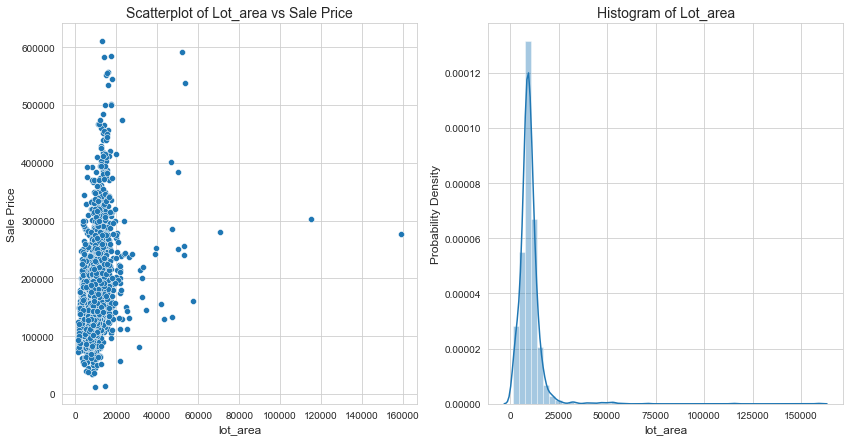

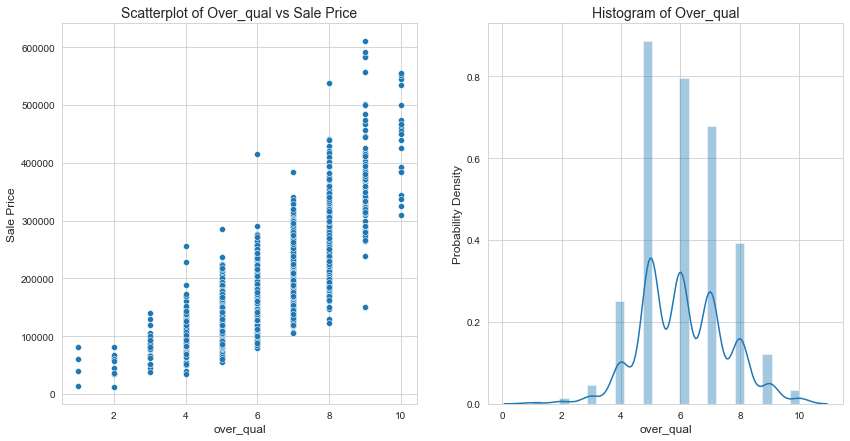

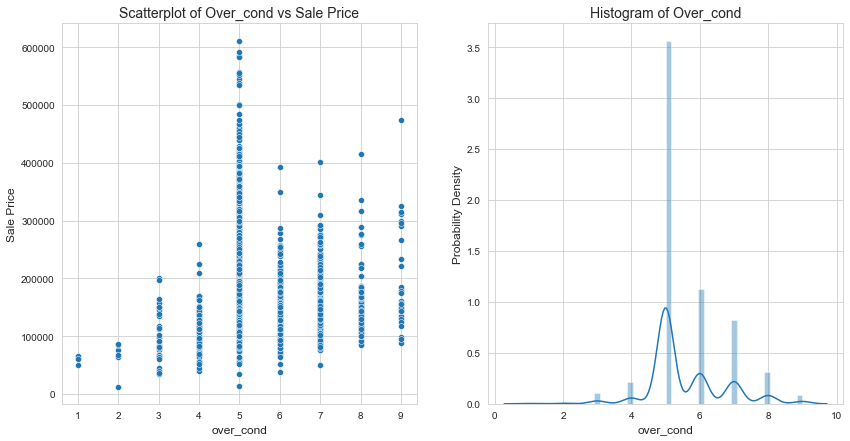

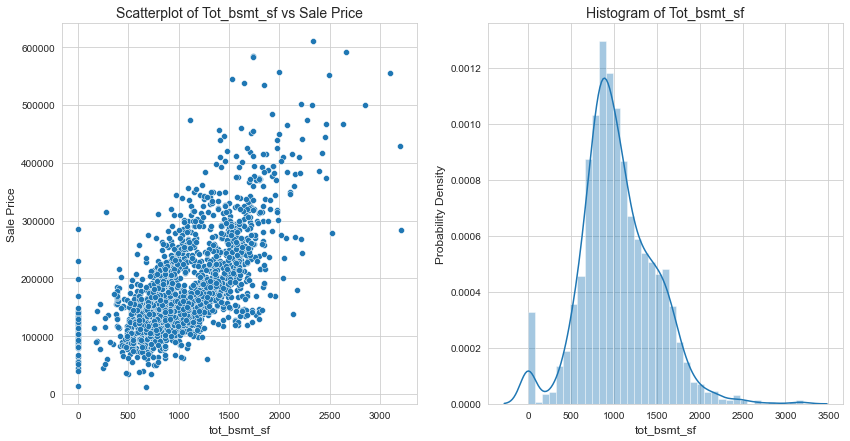

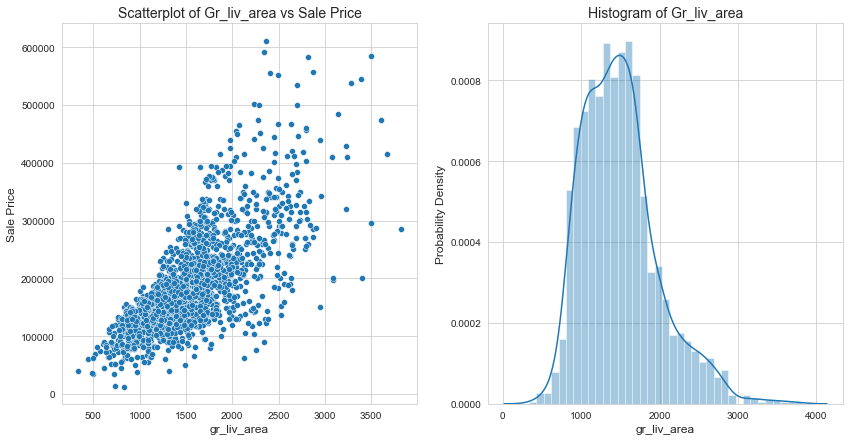

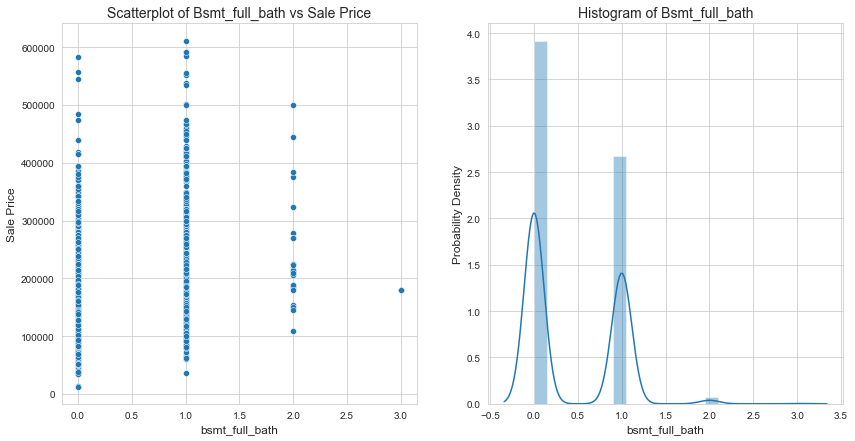

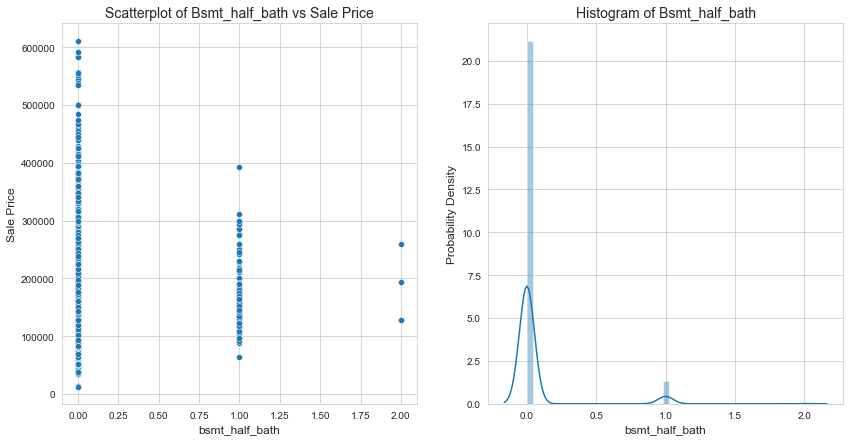

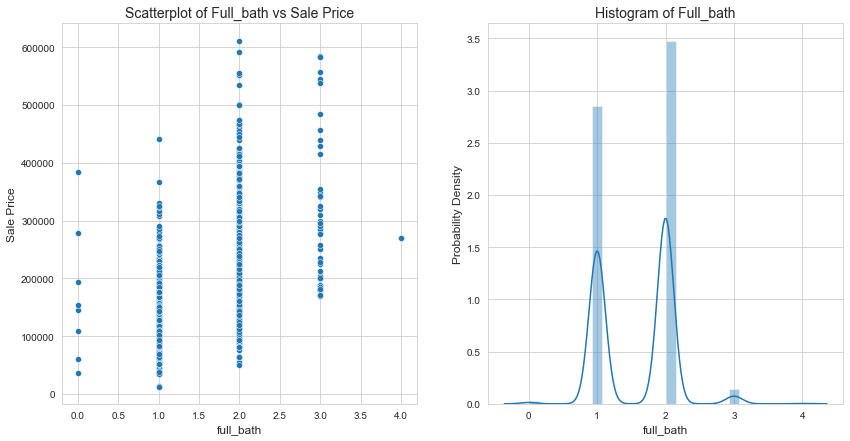

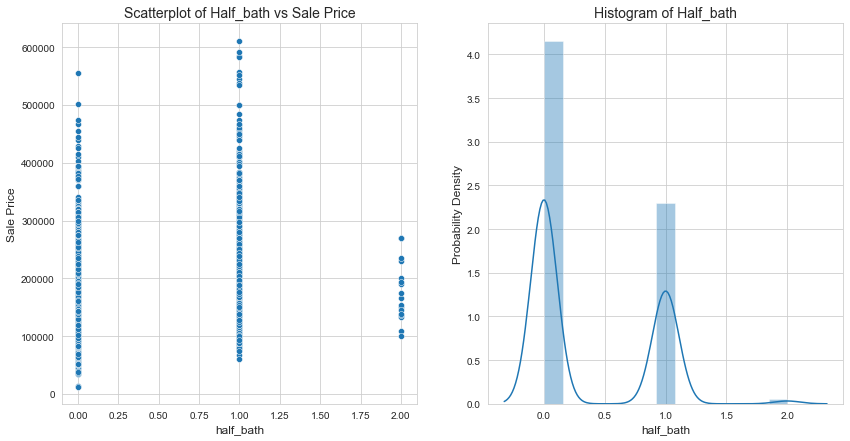

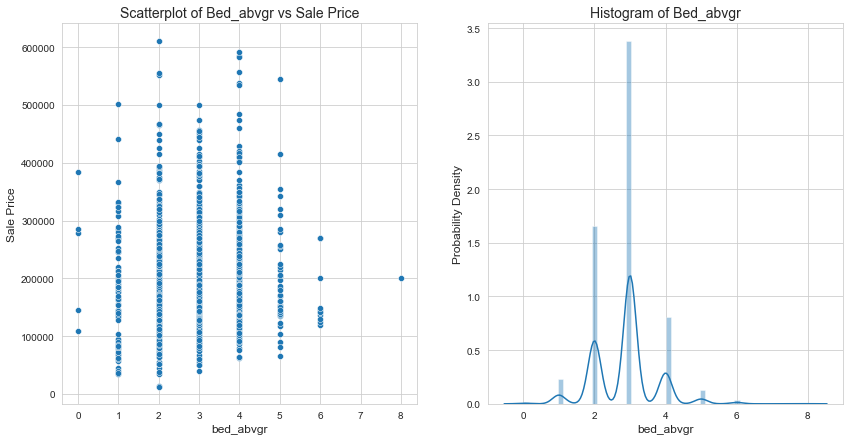

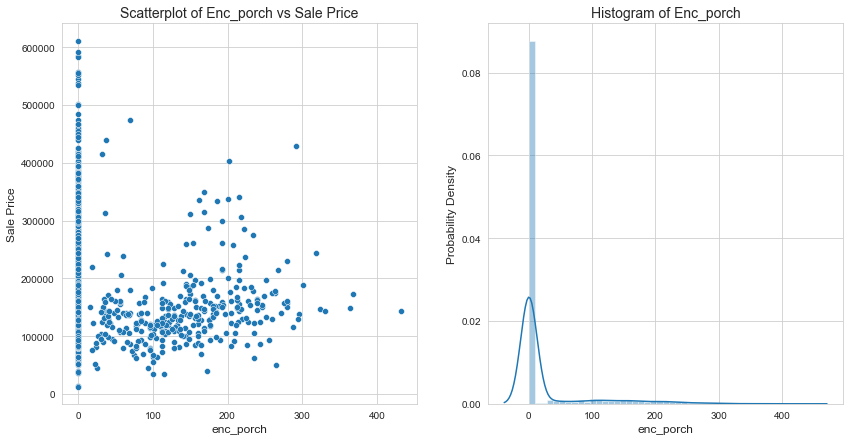

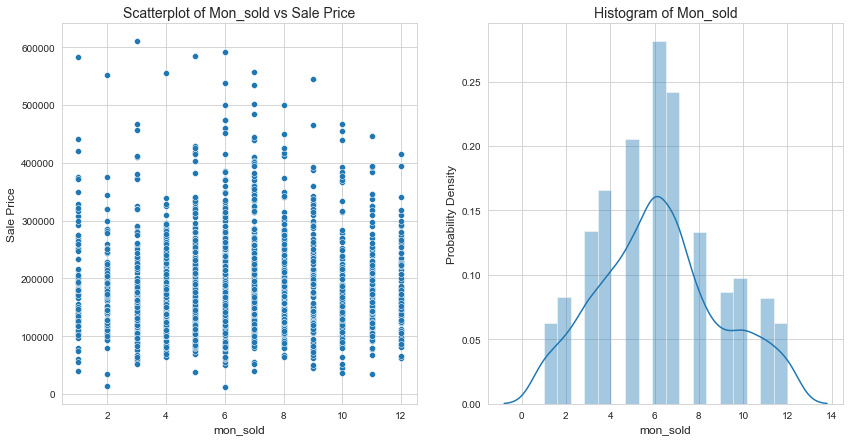

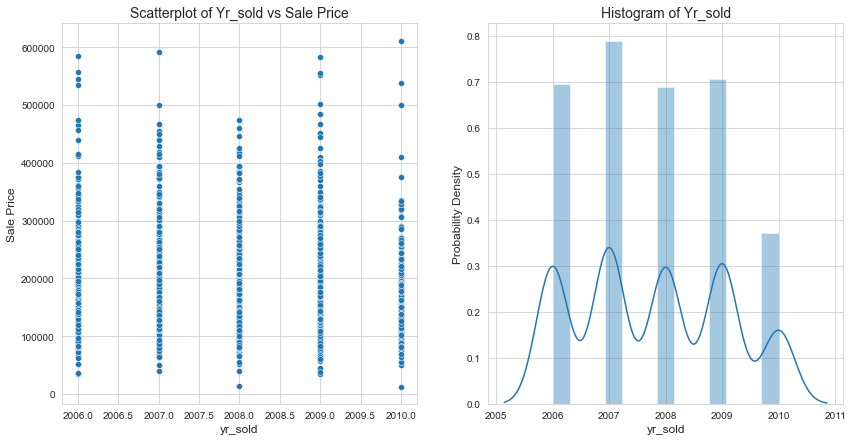

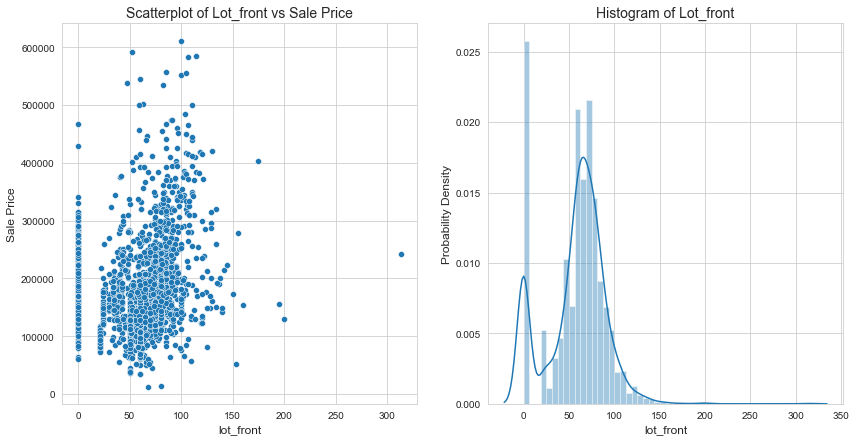

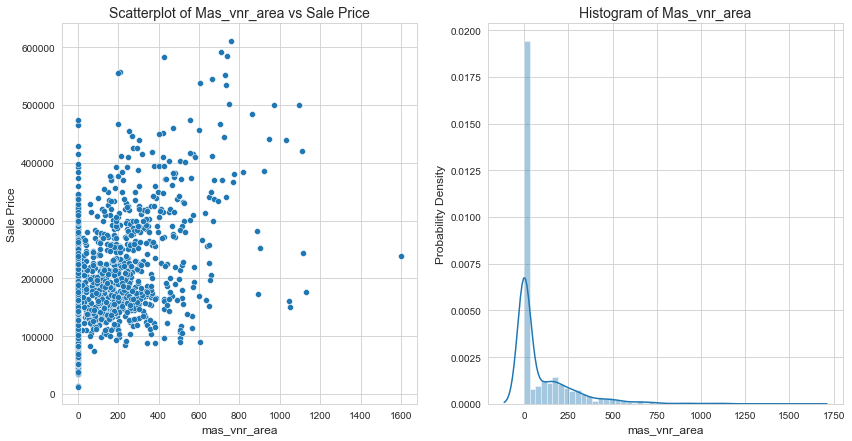

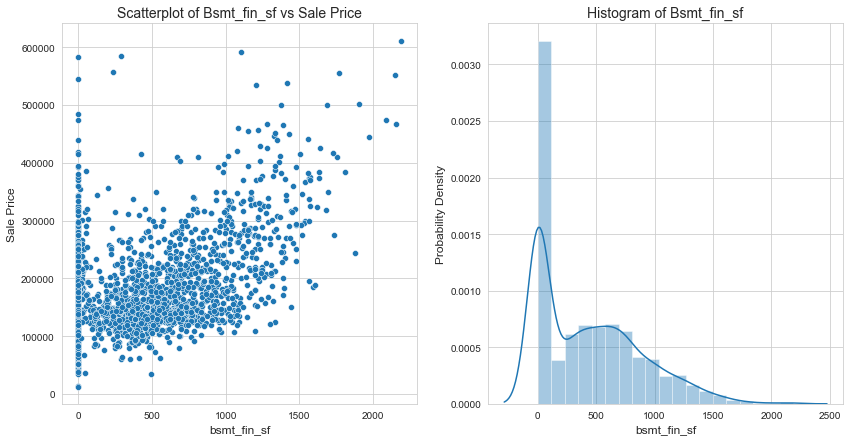

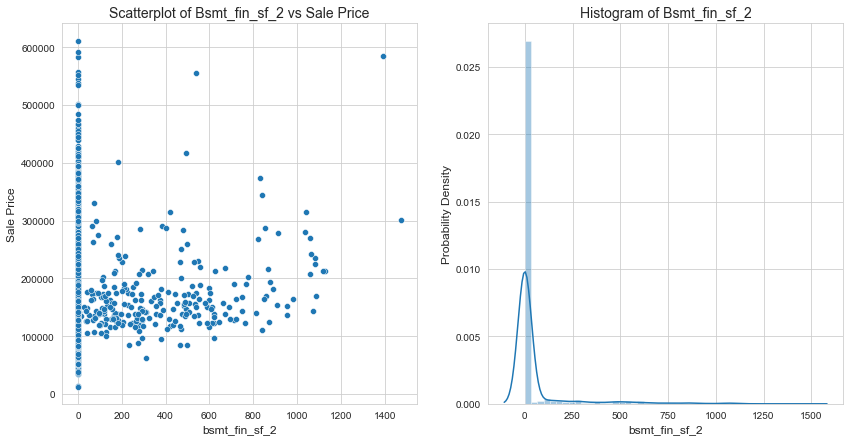

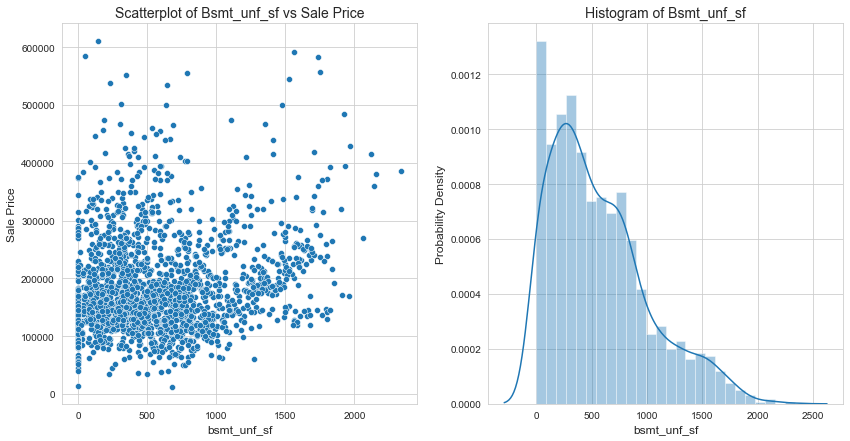

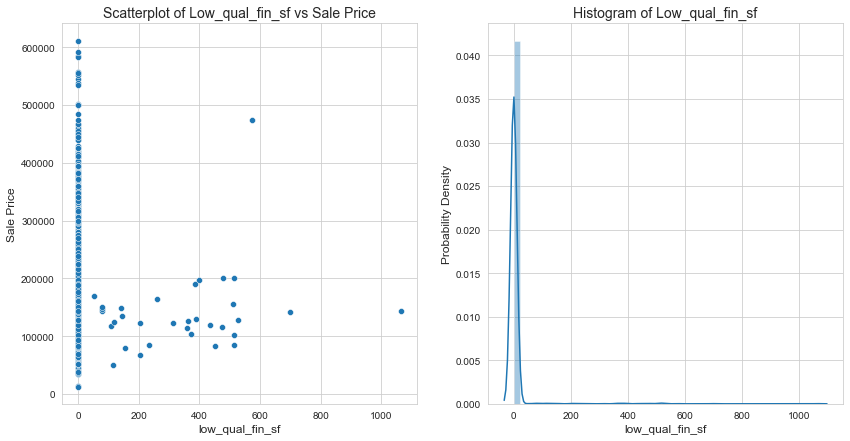

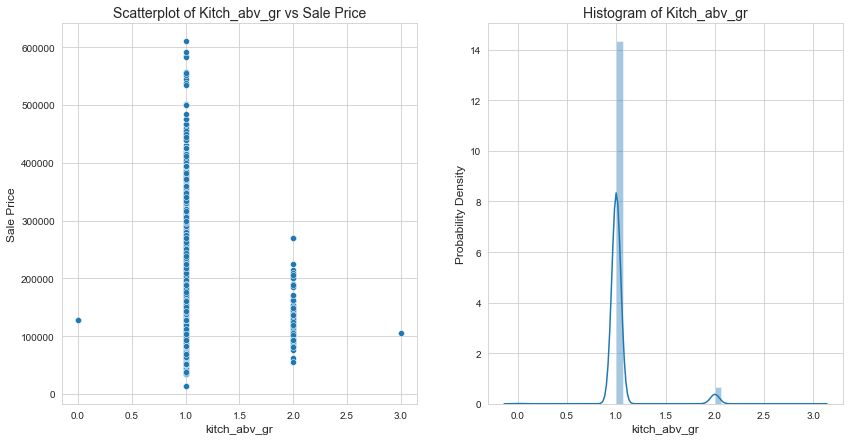

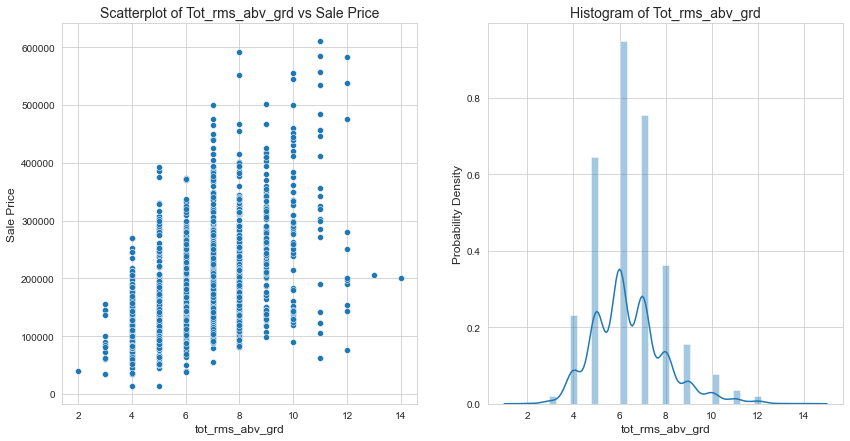

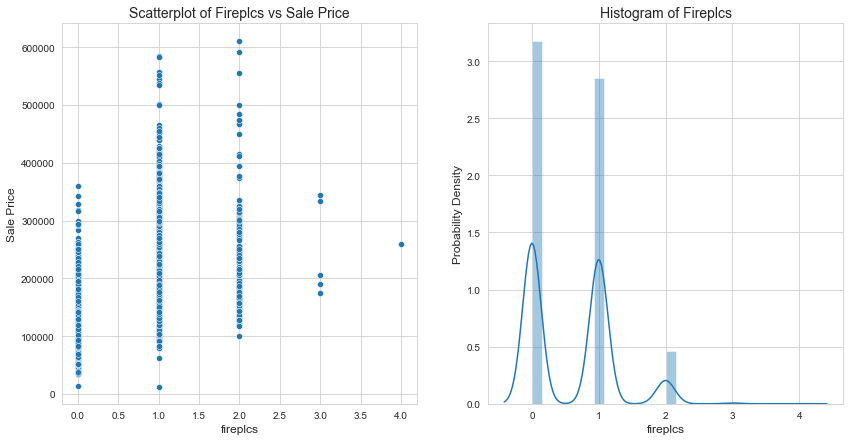

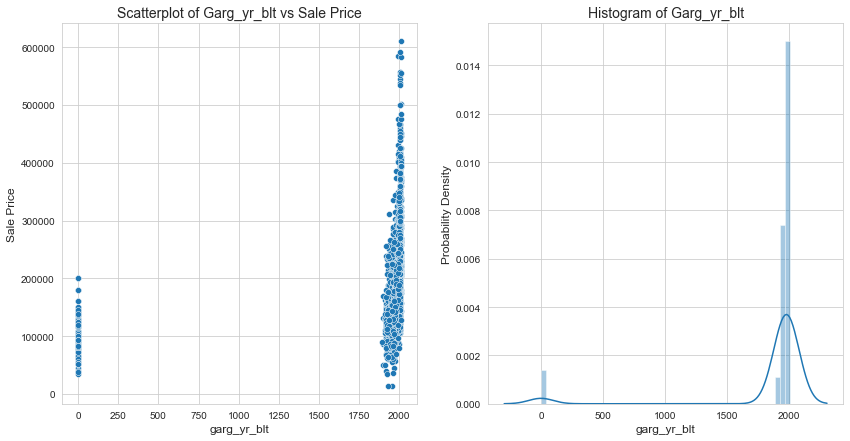

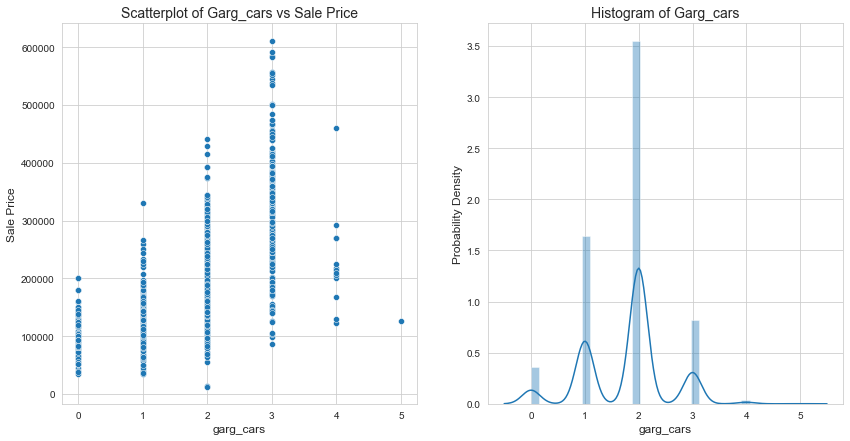

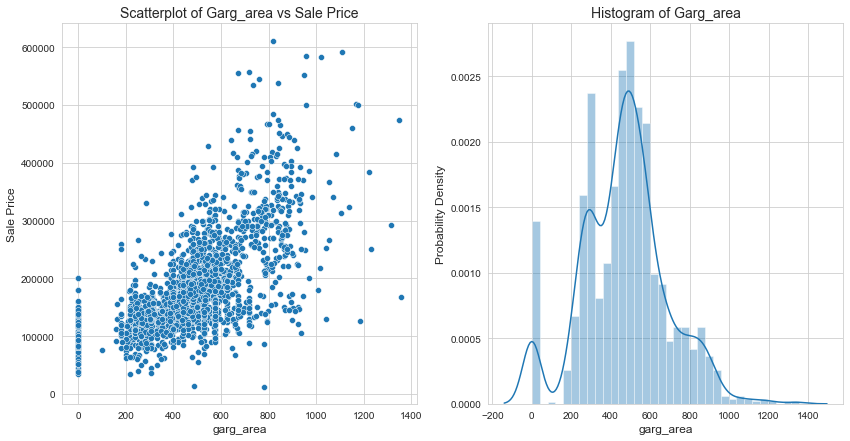

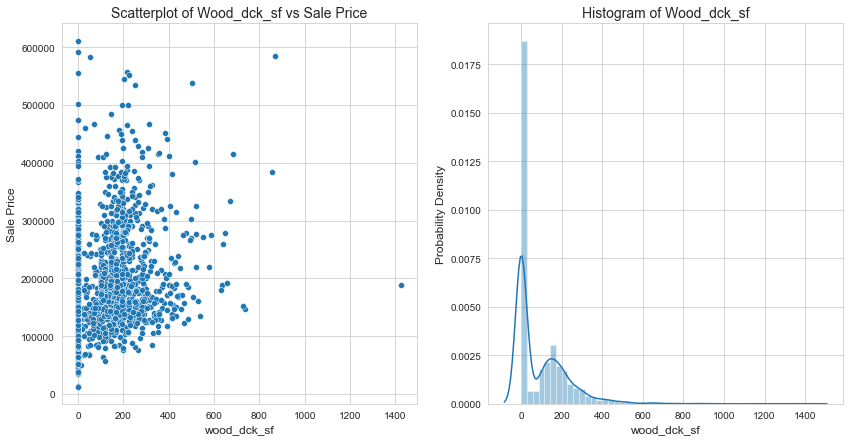

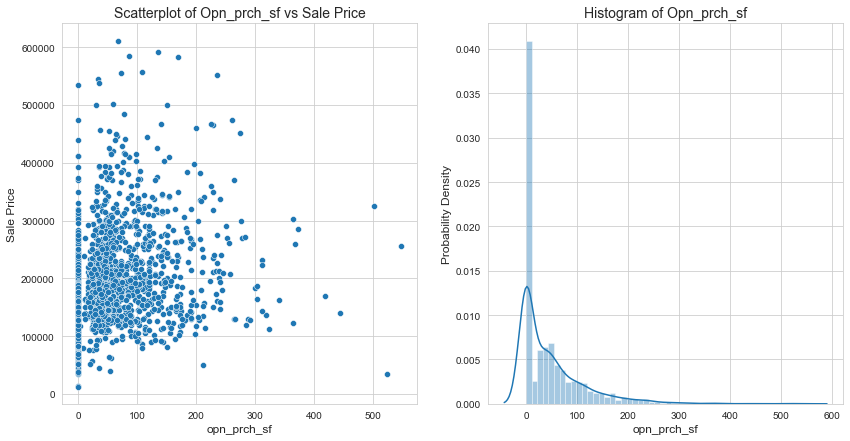

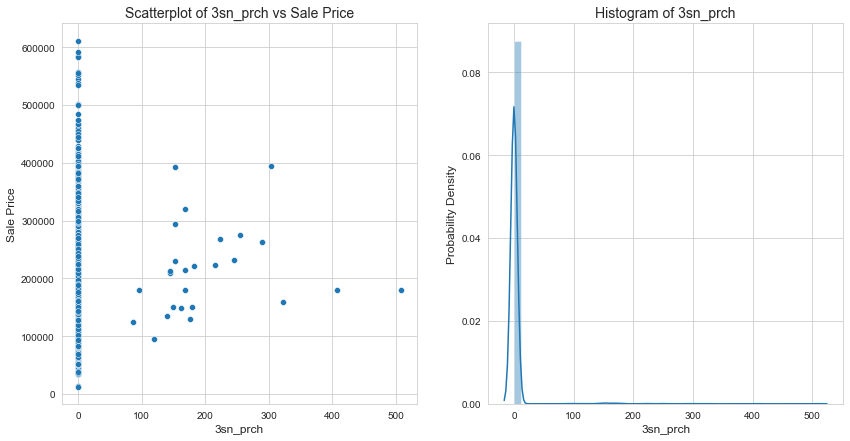

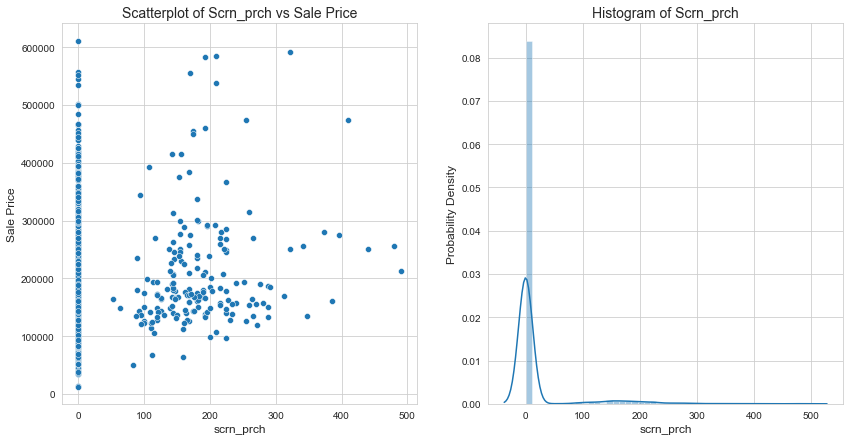

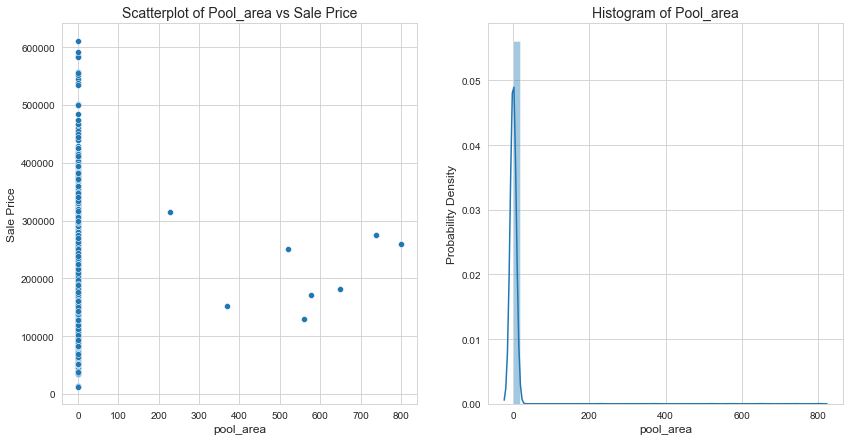

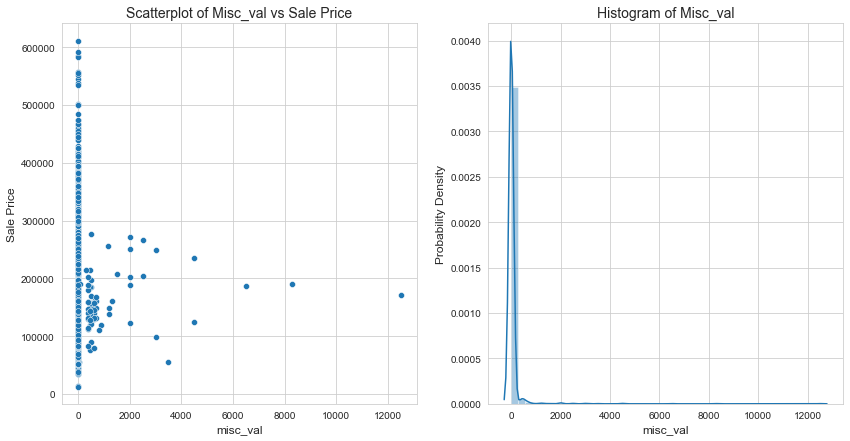

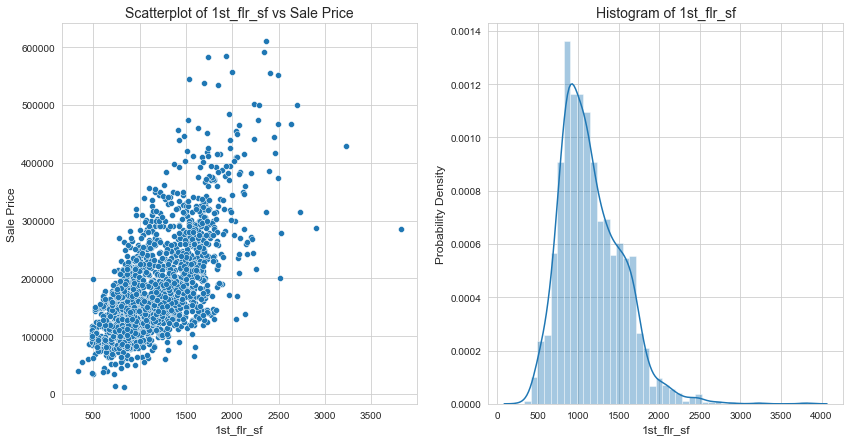

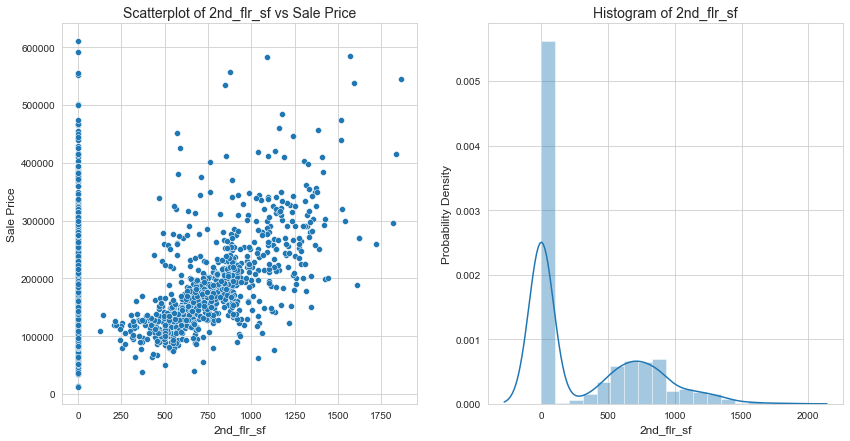

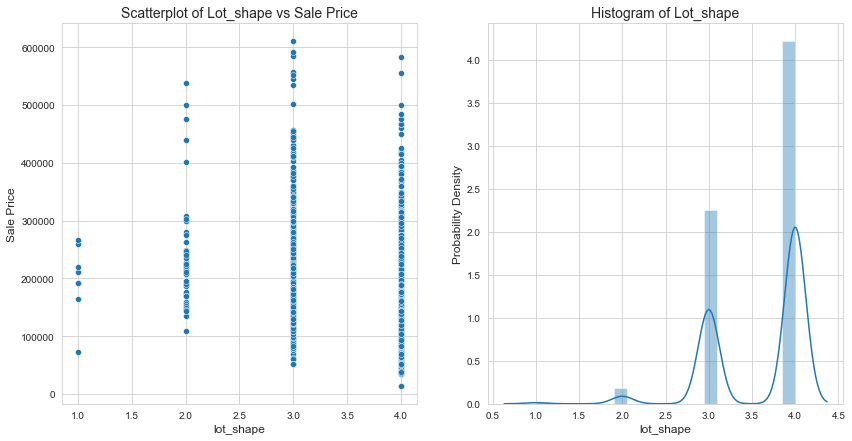

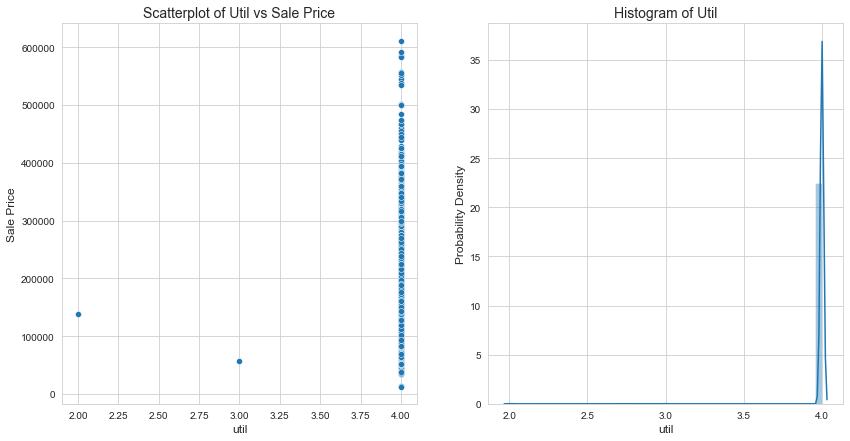

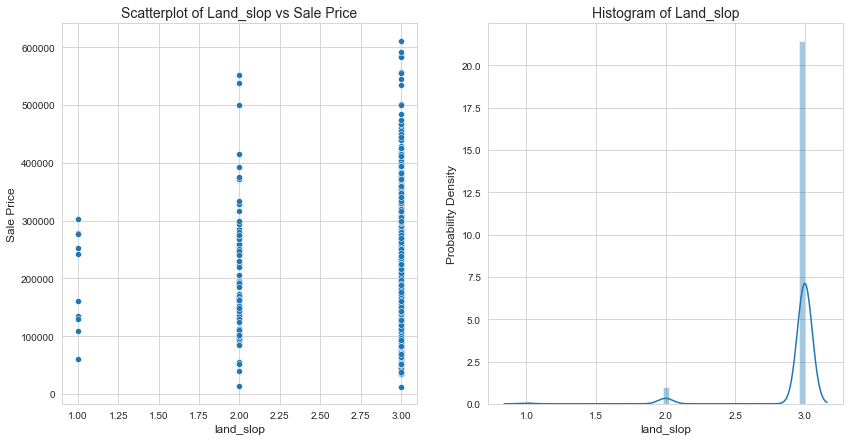

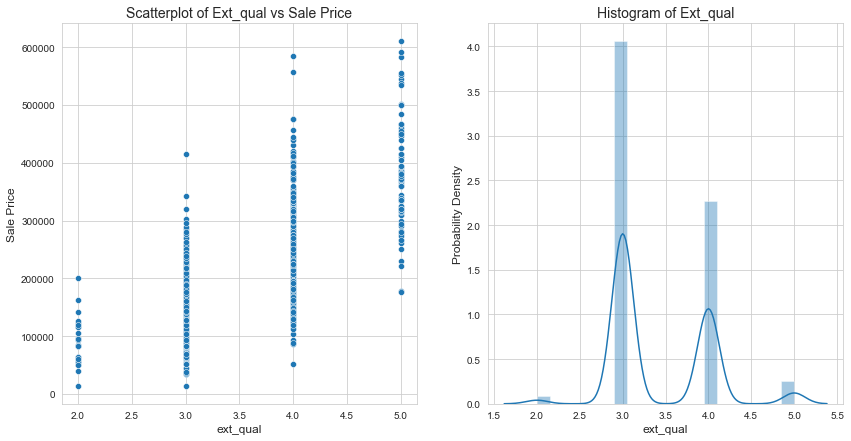

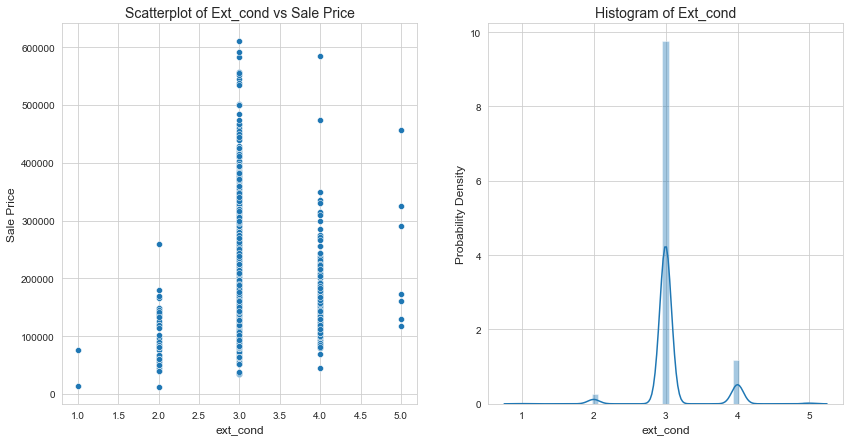

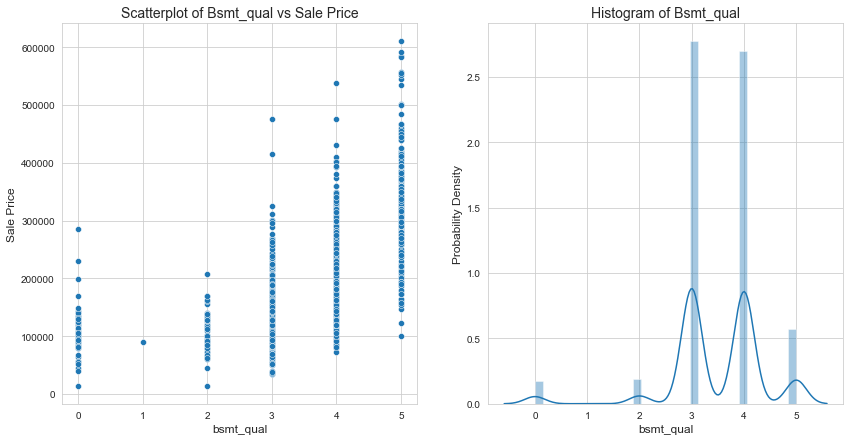

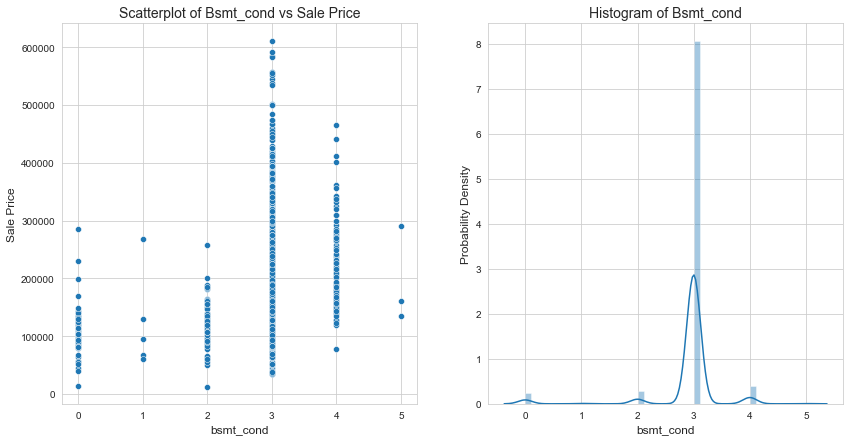

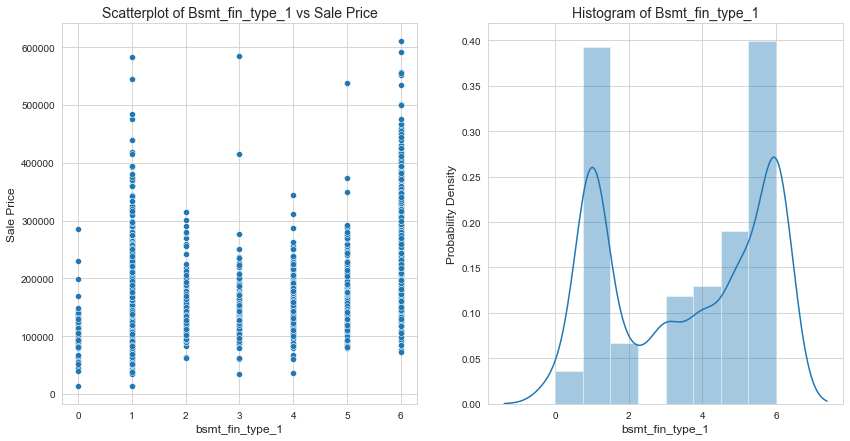

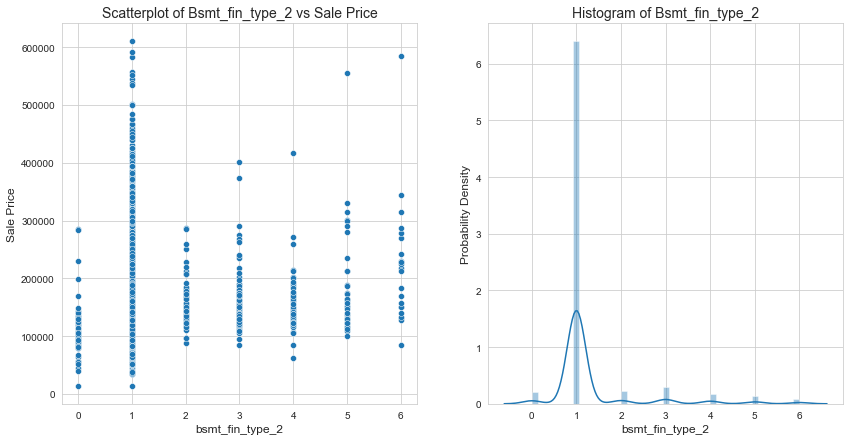

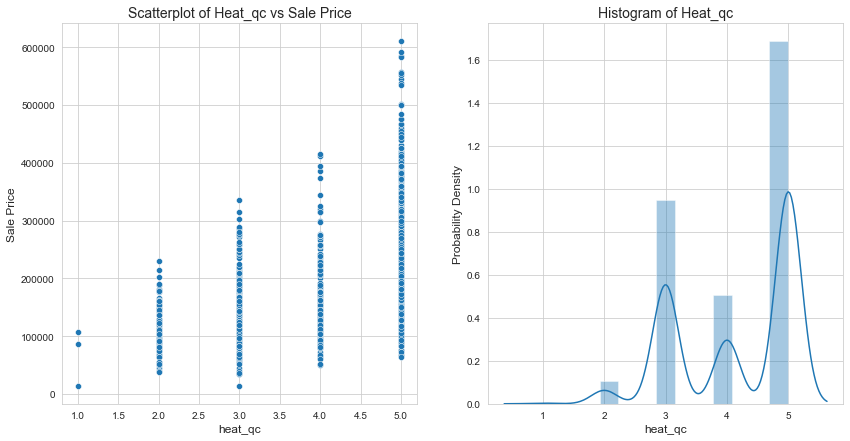

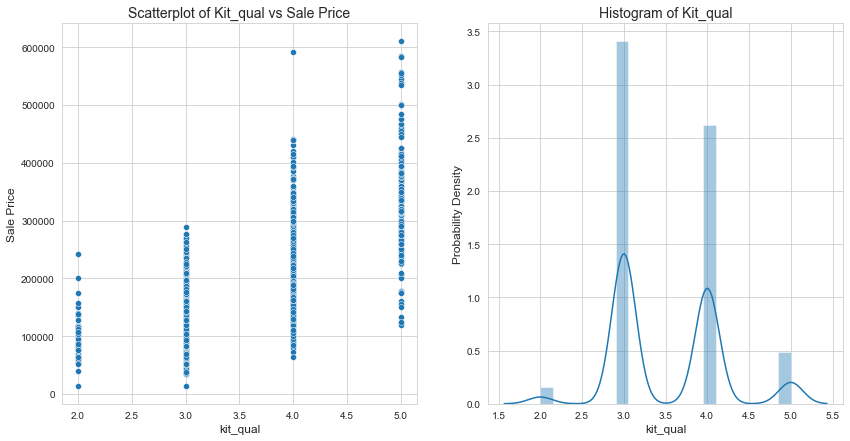

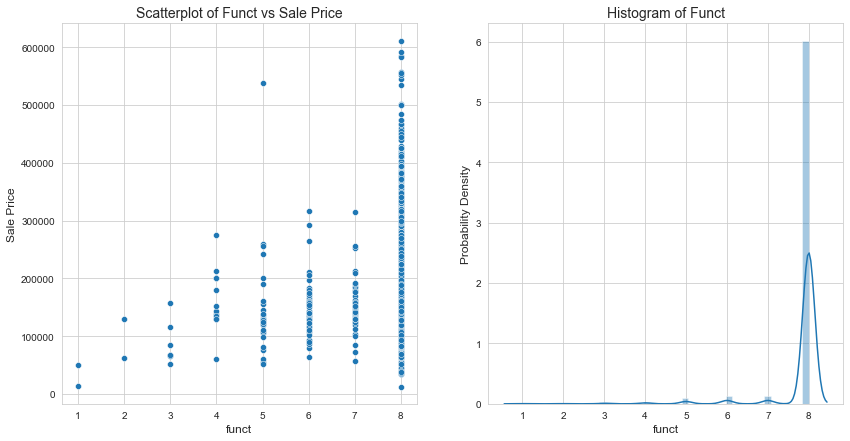

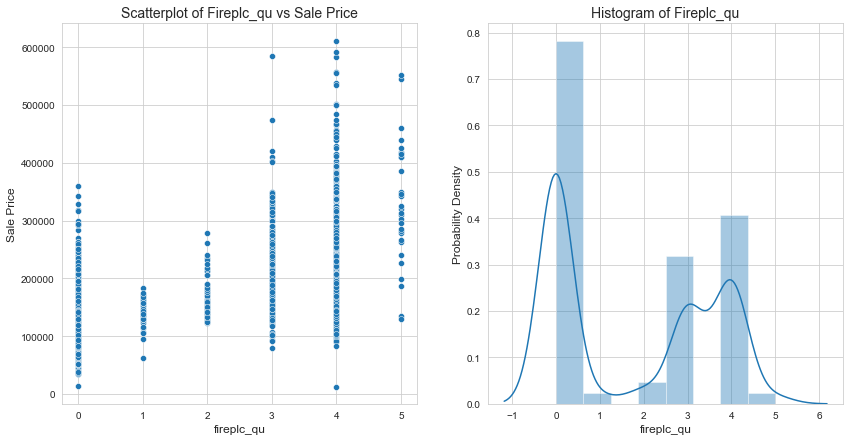

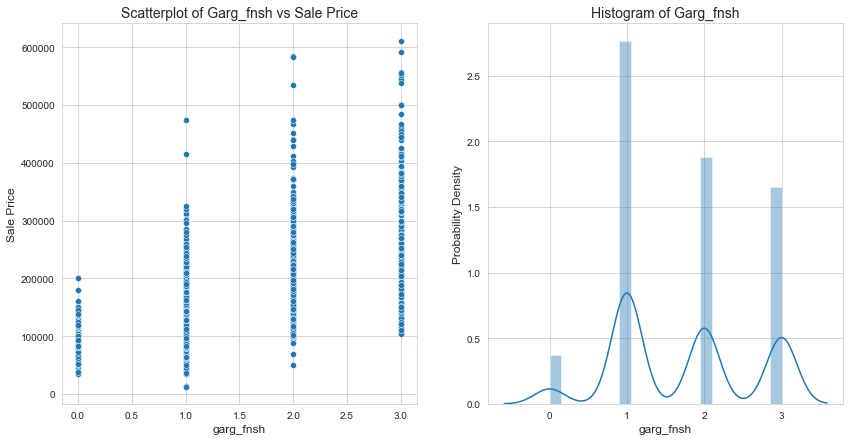

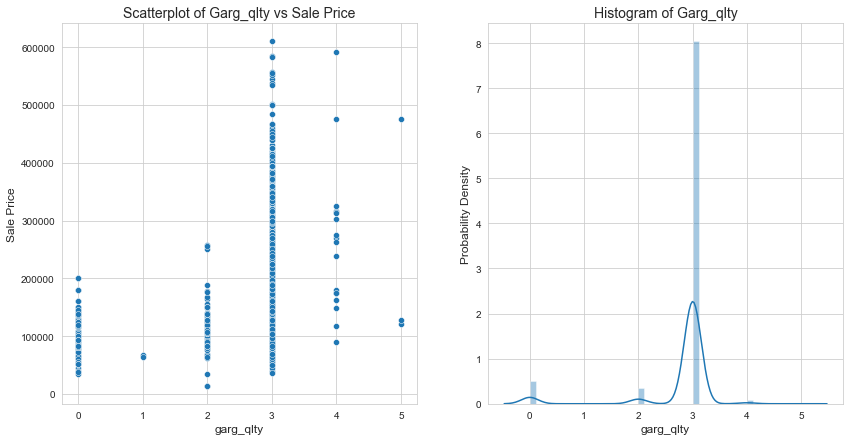

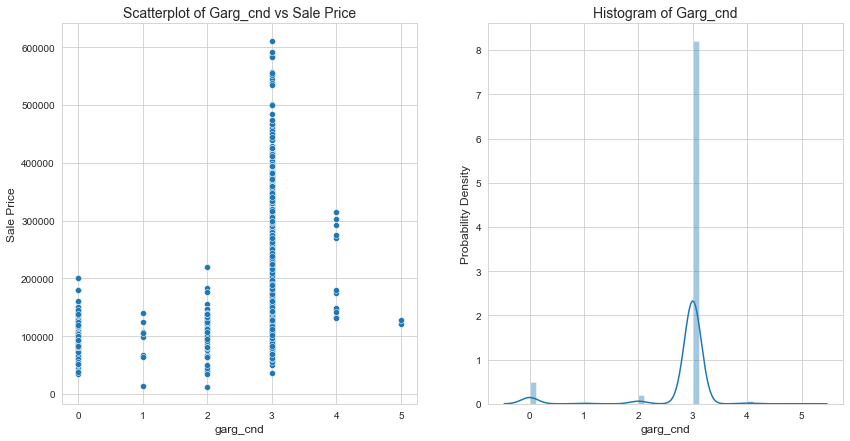

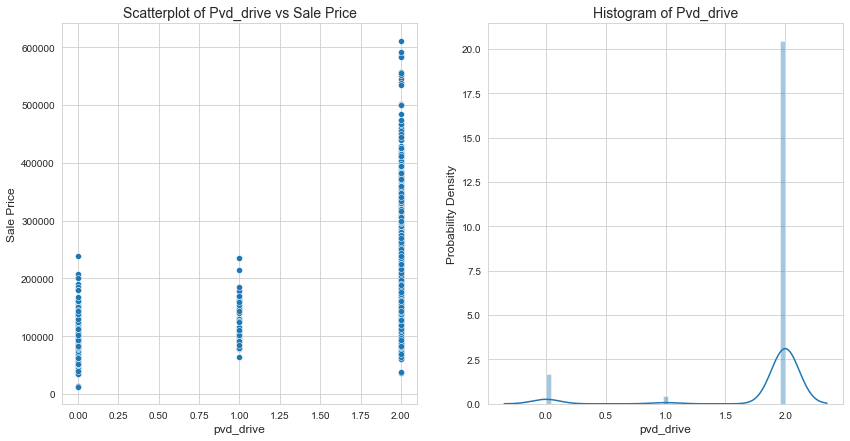

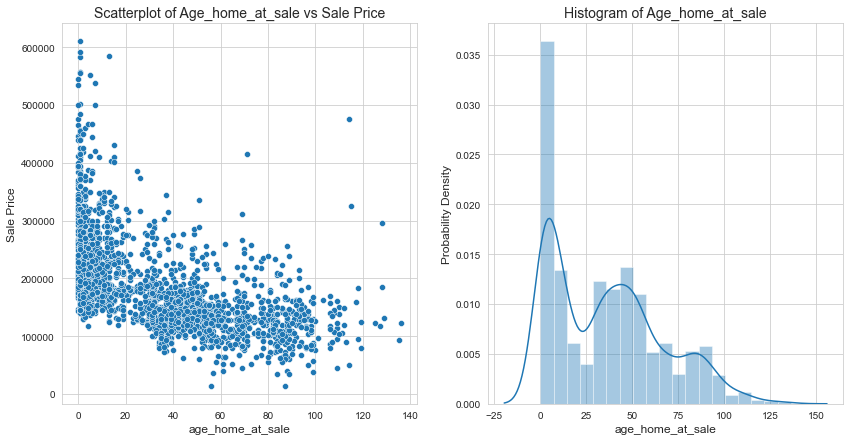

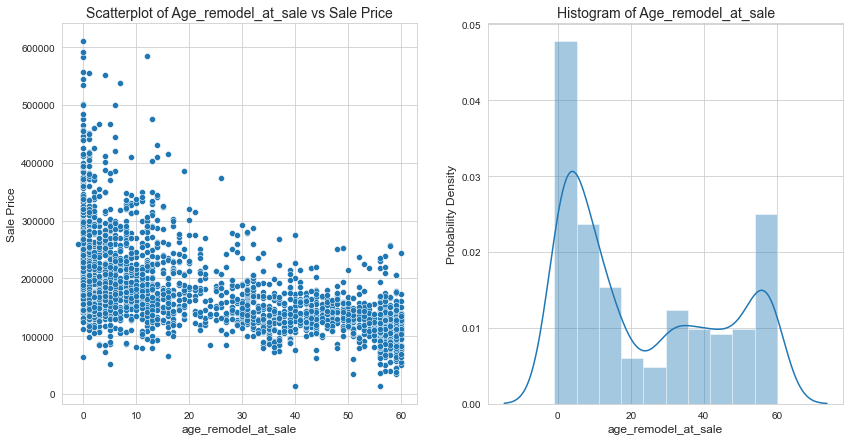

In [40]:
# plotting the scatterplot and histogram for the numerical variable
for col in num_features2:
    single_hist_scatter(X1_train, col, (14,7))

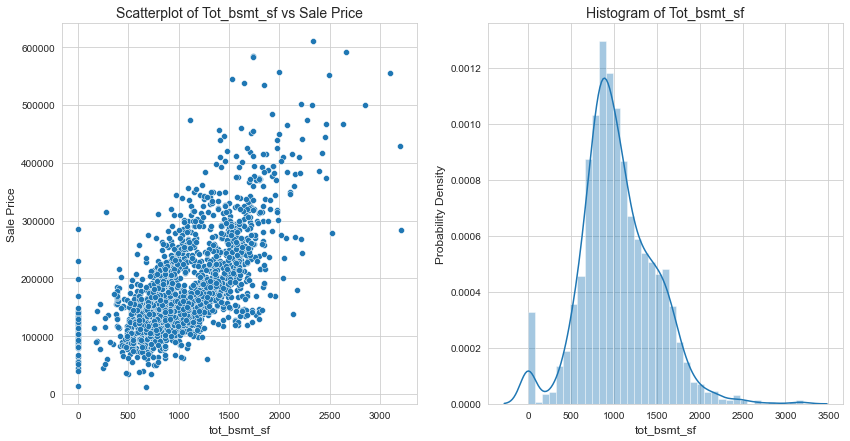

In [41]:
# printing standalone chart for presentation
single_hist_scatter(X1_train, 'tot_bsmt_sf', (14,7))

After evaluating the initial set of features (X variables), it is observed that quite a number of features do not have linear relationship with the y variable - sale price. Hence, a linear regression model will not perform well if I include these features. There is a need to do feature engineering if I hope to create a good model. This will be covered in the notebook - Feature Elimination and Modelling.

### Examining the Y Variable (dependent variable)

In [42]:
# renaming the y variable
y_train = df_combined[targ]
y_train.rename(columns = { 'SalePrice':'sale_price'}, inplace=True)

In [43]:
# checking the y variable
print(y_train.shape)
y_train.head()

(2049, 1)


sale_price
0      130500
1      220000
2      109000
3      174000
4      138500

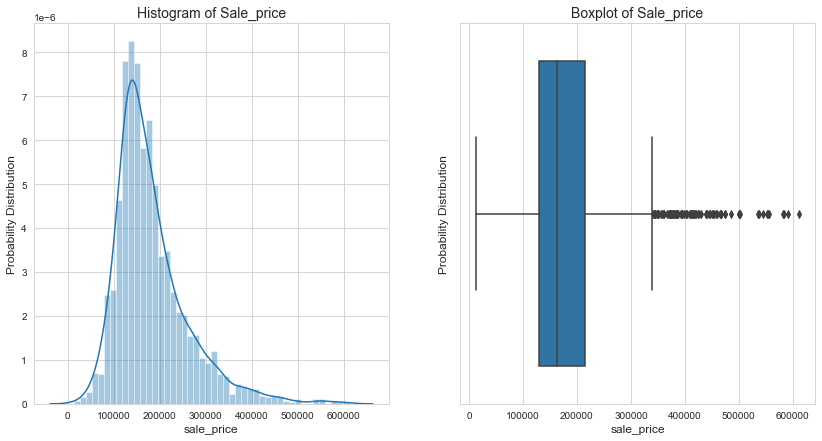

In [44]:
# plotting histogram and boxplot to evaluate the y variable.
single_hist_box(y_train, 'sale_price', (14,7))

In [45]:
# saving the cleaned dataframes to various csv files
y_train_dataframe = "y_clean.csv"
y_train.to_csv(os.path.join(data_path, y_train_dataframe), index = False)

train_dataframe = "train_clean.csv"
X1_train.to_csv(os.path.join(data_path, train_dataframe), index = False)

test_dataframe = "test_clean.csv"
X1_test.to_csv(os.path.join(data_path, test_dataframe), index = False)

### Data Dictionary

| **Feature**  | **Description**  |
| :-|:-|
| MS SubClass  | The type of dwelling involved in the sale  |
| MS Zoning   | Identifies the general zoning classification of the sale  |
| Lot Frontage  | Linear feet of street connected to property  |
| Lot Area   | Lot size in square feet  |
| Street  | Type of road access to property  |
| Alley   | Type of alley access to property  |
| Lot Shape  | General shape of property  |
| Land Contour | Flatness of the property  |
| Utilities  | Type of utilities available  |
| Lot Config  | Lot configuration  |
| Land Slope  | Slope of property  |
| Neighborhood  | Physical locations within Ames city limits  |
| Condition 1  | Proximity to various conditions such as arterial street, feeder street, railroad  |
| Condition 2  | Proximity to various conditions such as arterial street, feeder street, railroad (if more than one is present)  |
| Bldg Type   | Type of dwelling  |
| House Style |  Style of dwelling |
| Overall Qual  |  Rates the overall material and finish of the house |
| Overall Cond  | Rates the overall condition of the house |
| Year Built  | Original construction date  |
| Year Remod/Add  | Remodel date (same as construction date if no remodeling or additions) |
| Roof Style  | Type of roof |
| Roof Matl  | Roof material  |
| Exterior 1st  |  Exterior covering on house |
| Exterior 2nd  | Exterior covering on house (if more than one material)  |
| Mas Vnr Type  | Masonry veneer type |
| Mas Vnr Area  | Masonry veneer area in square feet  |
| Exter Qual  | Evaluates the quality of the material on the exterior   |
| Exter Cond  | Evaluates the present condition of the material on the exterior  |
| Foundation  | Type of foundation  |
| Bsmt Qual  | Evaluates the height of the basement  |
| Bsmt Cond   | Evaluates the general condition of the basement  |
| Bsmt Exposure  | Refers to walkout or garden level walls  |
| BsmtFin Type 1  | Rating of basement finished area  |
| BsmtFin SF 1  | Type 1 finished square feet  |
| BsmtFin Type 2  | Rating of basement finished area (if multiple types)  |
| BsmtFin SF 2   | Type 2 finished square feet  |
| Bsmt Unf SF  | Unfinished square feet of basement area  |
| Total Bsmt SF | Total square feet of basement area  |
| Heating  | Type of heating  |
| Heating QC  | Heating quality and condition  |
| Central Air  | Central air conditioning  |
| Electrical | Electrical system |
| 1st Flr SF  | First Floor square feet  |
| 2nd Flr SF  | Second floor square feet  |
| Low Qual Fin SF  | Low quality finished square feet (all floors)  |
| Gr Liv Area   | Above grade (ground) living area square feet  |
| Bsmt Full Bath  | Basement full bathrooms  |
| Bsmt Half Bath  | Basement half bathrooms  |
| Full Bath  | Full bathrooms above grade  |
| Half Bath   | Half baths above grade  |
| Bedroom AbvGr  | Bedrooms above grade (does NOT include basement bedrooms)  |
| Kitchen AbvGr  | Kitchens above grade  |
| Kitchen Qual  | Kitchen quality  |
| TotRms AbvGrd  | Total rooms above grade (does not include bathrooms)  |
| Functional  | Home functionality (Assume typical unless deductions are warranted)  |
| Fireplaces  | Number of fireplaces  |
| Fireplace Qu  | Fireplace quality  |
| Garage Type  | Garage location  |
| Garage Yr Blt  | Year garage was built  |
| Garage Finish  | Interior finish of the garage  |
| Garage Cars  | Size of garage in car capacity  |
| Garage Area  | Size of garage in square feet  |
| Garage Qual  | Garage quality  |
| Garage Cond   | Garage condition  |
| Paved Drive  | Paved driveway  |
| Wood Deck SF  | Wood deck area in square feet  |
| Open Porch SF  | Open porch area in square feet  |
| Enclosed Porch  | Enclosed porch area in square feet  |
| 3-Ssn Porch   | Three season porch area in square feet  |
| Screen Porch  | Screen porch area in square feet  |
| Pool Area   | Pool area in square feet  |
| Pool QC  | Pool quality  |
| Fence  | Fence quality  |
| Misc Feature  | Miscellaneous feature not covered in other categories  |
| Misc Val  | $Value of miscellaneous feature  |
| Mo Sold   | Month Sold  |
| Yr Sold  | Year Sold   |
| Sale Type  | Type of sale  |
| SalePrice  | The property's sale price in dollars |

### Variable Details

MS SubClass: Identifies the type of dwelling involed in the sale: 
- 20 1-STORY 1946 & NEWER ALL STYLES 
- 30 1-STORY 1945 & OLDER 
- 40 1-STORY W/FINISHED ATTIC ALL AGES 45 1-1/2 STORY - UNFINISHED ALL AGES 
- 50 1-1/2 STORY FINISHED ALL AGES 
- 60 2-STORY 1946 & NEWER 
- 70 2-STORY 1945 & OLDER 75 2-1/2 STORY ALL AGES 
- 80 SPLIT OR MULTI-LEVEL 85 SPLIT FOYER 
- 90 DUPLEX - ALL STYLES AND AGES 
- 120 1-STORY PUD (Planned Unit Development) - 1946 & NEWER 
- 150 1-1/2 STORY PUD - ALL AGES 
- 160 2-STORY PUD - 1946 & NEWER 
- 180 PUD - MULTILEVEL - INCL SPLIT LEV/FOYER 
- 190 2 FAMILY CONVERSION - ALL STYLES AND AGES

MS Zoning: Identifies the general zoning classification of the sale. 
- A Agriculture 
- C Commercial 
- FV Floating Village Residential 
- I Industrial 
- RH Residential High Density 
- RL Residential Low Density 
- RP Residential Low Density Park 
- RM Residential Medium Density

Lot Frontage: Linear feet of street connected to property

Lot Area: Lot size in square feet

Street: Type of road access to property 
- Grvl Gravel 
- Pave Paved

Alley: Type of alley access to property 
- Grvl Gravel 
- Pave Paved 
- NA No alley access

Lot Shape: General shape of property 
- Reg Regular 
- IR1 Slightly irregular 
- IR2 Moderately Irregular 
- IR3 Irregular

Land Contour: Flatness of the property 
- Lvl Near Flat/Level 
- Bnk Banked - Quick and significant rise from street grade to building
- HLS Hillside - Significant slope from side to side 
- Low Depression

Utilities: Type of utilities available 
- AllPub All public Utilities (E,G,W,& S)
- NoSewr Electricity, Gas, and Water (Septic Tank) 
- NoSeWa Electricity and Gas Only 
- ELO Electricity only

Lot Config: Lot configuration 
- Inside Inside lot 
- Corner Corner lot 
- CulDSac Cul-de-sac 
- FR2 Frontage on 2 sides of property 
- FR3 Frontage on 3 sides of property

Land Slope: Slope of property 
- Gtl Gentle slope 
- Mod Moderate Slope 
- Sev Severe Slope

Neighborhood: Physical locations within Ames city limits 
- Blmngtn Bloomington Heights 
- Blueste Bluestem 
- BrDale Briardale 
- BrkSide Brookside 
- ClearCr Clear Creek 
- CollgCr College Creek 
- Crawfor Crawford 
- Edwards Edwards 
- Gilbert Gilbert 
- Greens Greens
- GrnHill Green Hills
- IDOTRR Iowa DOT and Rail Road 
- MeadowV Meadow Village 
- Mitchel Mitchell 
- Names North Ames 
- NoRidge Northridge 
- NPkVill Northpark Villa 
- NridgHt Northridge Heights 
- NWAmes Northwest Ames 
- OldTown Old Town 
- SWISU South & West of Iowa State University 
- Sawyer Sawyer 
- SawyerW Sawyer West 
- Somerst Somerset 
- StoneBr Stone Brook 
- Timber Timberland 
- Veenker Veenker

Condition 1: Proximity to main road or railroad 
- Artery Adjacent to arterial street 
- Feedr Adjacent to feeder street 
- Norm Normal 
- RRNn Within 200' of North-South Railroad 
- RRAn Adjacent to North-South Railroad 
- PosN Near positive off-site feature--park, greenbelt, etc. 
- PosA Adjacent to postive off-site feature 
- RRNe Within 200' of East-West Railroad 
- RRAe Adjacent to East-West Railroad

Condition 2: Proximity to main road or railroad (if a second is present) 
- Artery Adjacent to arterial street 
- Feedr Adjacent to feeder street 
- Norm Normal 
- RRNn Within 200' of North-South Railroad 
- RRAn Adjacent to North-South Railroad 
- PosN Near positive off-site feature--park, greenbelt, etc. 
- PosA Adjacent to postive off-site feature 
- RRNe Within 200' of East-West Railroad 
- RRAe Adjacent to East-West Railroad

Bldg Type: Type of dwelling 
- 1Fam Single-family Detached 
- 2FmCon Two-family Conversion; originally built as one-family dwelling 
- Duplx Duplex 
- TwnhsE Townhouse End Unit 
- TwnhsI Townhouse Inside Unit

House Style: Style of dwelling 
- 1Story One story 
- 1.5Fin One and one-half story: 2nd level finished 
- 1.5Unf One and one-half story: 2nd level unfinished 
- 2Story Two story 
- 2.5Fin Two and one-half story: 2nd level finished 
- 2.5Unf Two and one-half story: 2nd level unfinished 
- SFoyer Split Foyer 
- SLvl Split Level

Overall Qual: Overall material and finish quality 
- 10 Very Excellent 
- 9 Excellent 
- 8 Very Good 
- 7 Good 
- 6 Above Average 
- 5 Average 
- 4 Below Average 
- 3 Fair 
- 2 Poor 
- 1 Very Poor

Overall Cond: Overall condition rating
- 10 Very Excellent
- 9 Excellent 
- 8 Very Good 
- 7 Good 
- 6 Above Average 
- 5 Average 
- 4 Below Average 
- 3 Fair 
- 2 Poor 
- 1 Very Poor

Year Built: Original construction date

Year Remod/Add: Remodel date (same as construction date if no remodeling or additions)

Roof Style: Type of roof 
- Flat Flat 
- Gable Gable 
- Gambrel Gabrel (Barn) 
- Hip Hip 
- Mansard Mansard 
- Shed Shed

Roof Matl: Roof material 
- ClyTile Clay or Tile 
- CompShg Standard (Composite) Shingle 
- Membran Membrane 
- Metal Metal 
- Roll Roll 
- Tar&Grv Gravel & Tar 
- WdShake Wood Shakes 
- WdShngl Wood Shingles 

Exterior 1st: Exterior covering on house 
- AsbShng Asbestos Shingles 
- AsphShn Asphalt Shingles 
- BrkComm Brick Common 
- BrkFace Brick Face 
- CBlock Cinder Block 
- CemntBd Cement Board 
- HdBoard Hard Board 
- ImStucc Imitation Stucco 
- MetalSd Metal Siding 
- Other Other 
- Plywood Plywood 
- PreCast PreCast 
- Stone Stone 
- Stucco Stucco 
- VinylSd Vinyl Siding 
- Wd Sdng Wood Siding 
- WdShing Wood Shingles

Exterior 2nd: Exterior covering on house (if more than one material) 
- AsbShng Asbestos Shingles 
- AsphShn Asphalt Shingles 
- BrkComm Brick Common 
- BrkFace Brick Face 
- CBlock Cinder Block 
- CemntBd Cement Board 
- HdBoard Hard Board 
- ImStucc Imitation Stucco 
- MetalSd Metal Siding 
- Other Other 
- Plywood Plywood 
- PreCast PreCast 
- Stone Stone 
- Stucco Stucco 
- VinylSd Vinyl Siding 
- Wd Sdng Wood Siding 
- WdShing Wood Shingles

Mas Vnr Type: Masonry veneer type 
- BrkCmn Brick Common 
- BrkFace Brick Face 
- CBlock Cinder Block 
- None None 
- Stone Stone

Mas Vnr Area: Masonry veneer area in square feet

Exter Qual: Exterior material quality 
- Ex Excellent 
- Gd Good 
- TA Average/Typical 
- Fa Fair 
- Po Poor

Exter Cond: Present condition of the material on the exterior 
- Ex Excellent 
- Gd Good 
- TA Average/Typical 
- Fa Fair 
- Po Poor

Foundation: Type of foundation 
- BrkTil Brick & Tile 
- CBlock Cinder Block 
- PConc Poured Contrete 
- Slab Slab 
- Stone Stone 
- Wood Wood

Bsmt Qual: Height of the basement 
- Ex Excellent (100+ inches) 
- Gd Good (90-99 inches) 
- TA Typical (80-89 inches) 
- Fa Fair (70-79 inches) 
- Po Poor (<70 inches) NA No Basement

Bsmt Cond: General condition of the basement 
- Ex Excellent 
- Gd Good 
- TA Typical - slight dampness allowed 
- Fa Fair - dampness or some cracking or settling 
- Po Poor - Severe cracking, settling, or wetness 
- NA No Basement

Bsmt Exposure: Walkout or garden level basement walls 
- Gd Good Exposure 
- Av Average Exposure (split levels or foyers typically score average or above) 
- Mn Mimimum Exposure 
- No No Exposure 
- NA No Basement

BsmtFin Type 1: Quality of basement finished area 
- GLQ Good Living Quarters 
- ALQ Average Living Quarters 
- BLQ Below Average Living Quarters 
- Rec Average Rec Room 
- LwQ Low Quality 
- Unf Unfinshed 
- NA No Basement

BsmtFin SF 1: Type 1 finished square feet

BsmtFin Type 2: Quality of second finished area (if present) 
- GLQ Good Living Quarters 
- ALQ Average Living Quarters 
- BLQ Below Average Living Quarters 
- Rec Average Rec Room 
- LwQ Low Quality 
- Unf Unfinshed 
- NA No Basement

BsmtFin SF 2: Type 2 finished square feet

Bsmt Unf SF: Unfinished square feet of basement area

Total Bsmt SF: Total square feet of basement area

Heating: Type of heating 
- Floor Floor Furnace 
- GasA Gas forced warm air furnace 
- GasW Gas hot water or steam heat 
- Grav Gravity furnace 
- OthW Hot water or steam heat other than gas 
- Wall Wall furnace

Heating QC: Heating quality and condition 
- Ex Excellent 
- Gd Good 
- TA Average/Typical 
- Fa Fair 
- Po Poor

Central Air: Central air conditioning 
- N No 
- Y Yes

Electrical: Electrical system 
- SBrkr Standard Circuit Breakers & Romex 
- FuseA Fuse Box over 60 AMP and all Romex wiring (Average) 
- FuseF 60 AMP Fuse Box and mostly Romex wiring (Fair) 
- FuseP 60 AMP Fuse Box and mostly knob & tube wiring (poor) 
- Mix Mixed

1st Flr SF: First Floor square feet

2nd Flr SF: Second floor square feet

Low Qual Fin SF: Low quality finished square feet (all floors)

Gr Liv Area: Above grade (ground) living area square feet

Bsmt Full Bath: Basement full bathrooms

Bsmt Half Bath: Basement half bathrooms

Full Bath: Full bathrooms above grade

Half Bath: Half baths above grade

Bedroom AbvGr: Number of bedrooms above basement level

Kitchen AbvGr: Number of kitchens

KitchenQual: Kitchen quality 
- Ex Excellent
- Gd Good 
- TA Typical/Average 
- Fa Fair 
- Po Poor

TotRms AbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating 
- Typ Typical Functionality 
- Min1 Minor Deductions 1 
- Min2 Minor Deductions 2 
- Mod Moderate Deductions 
- Maj1 Major Deductions 1 
- Maj2 Major Deductions 2 
- Sev Severely Damaged 
- Sal Salvage only

Fireplaces: Number of fireplaces

Fireplace Qu: Fireplace quality 
- Ex Excellent - Exceptional Masonry Fireplace 
- Gd Good - Masonry Fireplace in main level 
- TA Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement 
- Fa Fair - Prefabricated Fireplace in basement 
- Po Poor - Ben Franklin Stove 
- NA No Fireplace

Garage Type: Garage location 
- 2Types More than one type of garage 
- Attchd Attached to home 
- asment Basement Garage 
- BuiltIn Built-In (Garage part of house - typically has room above garage) 
- CarPort Car Port 
- Detchd Detached from home 
- NA No Garage

Garage Yr Blt: Year garage was built

Garage Finish: Interior finish of the garage 
- Fin Finished 
- RFn Rough Finished 
- Unf Unfinished 
- NA No Garage

Garage Cars: Size of garage in car capacity

Garage Area: Size of garage in square feet

Garage Qual: Garage quality 
- Ex Excellent 
- Gd Good 
- TA Typical/Average 
- Fa Fair 
- Po Poor 
- NA No Garage

Garage Cond: Garage condition 
- Ex Excellent 
- Gd Good 
- TA Typical/Average 
- Fa Fair 
- Po Poor 
- NA No Garage

Paved Drive: Paved driveway 
- Y Paved 
- P Partial Pavement 
- N Dirt/Gravel

Wood Deck SF: Wood deck area in square feet

Open Porch SF: Open porch area in square feet

Enclosed Porch: Enclosed porch area in square feet

3-Ssn Porch: Three season porch area in square feet

Screen Porch: Screen porch area in square feet

Pool Area: Pool area in square feet

Pool QC: Pool quality 
- Ex Excellent 
- Gd Good 
- TA Average/Typical 
- Fa Fair 
- NA No Pool

Fence: Fence quality 
- GdPrv Good Privacy 
- MnPrv Minimum Privacy 
- GdWo Good Wood 
- MnWw Minimum Wood/Wire 
- NA No Fence

MiscFeature: Miscellaneous feature not covered in other categories
- Elev Elevator 
- Gar2 2nd Garage (if not described in garage section) 
- Othr Other 
- Shed Shed (over 100 SF) 
- TenC Tennis Court 
- NA None

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale
- WD Warranty Deed - Conventional 
- CWD Warranty Deed - Cash 
- VWD Warranty Deed - VA Loan 
- New Home just constructed and sold 
- COD Court Officer Deed/Estate 
- Con Contract 15% Down payment regular terms 
- ConLw Contract Low Down payment and low interest 
- ConLI Contract Low Interest 
- ConLD Contract Low Down 
- Oth Other

Sale Price: The property's sale price in dollars